## Importing all the necessary libraries

In [212]:
# -------------------- Data Analysis -------------------- #
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# -------------------- Preprocessing -------------------- #
from imblearn.over_sampling import RandomOverSampler, SMOTENC
from imblearn.under_sampling import RandomUnderSampler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline

# -------------------- Model selection -------------------- #
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold, StratifiedKFold
# from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif

# -------------------- All the ML models used -------------------- #
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# -------------------- Model evaluation -------------------- #
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import make_scorer, accuracy_score, f1_score, roc_auc_score, recall_score, precision_score, fbeta_score, roc_curve, balanced_accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

# -------------------- For miscellaneous things -------------------- #
import eli5
from IPython.display import display, HTML
import warnings
import time

warnings.filterwarnings('ignore')

def pretty_print(df):
    return display(HTML(df.to_html().replace("\\n","<br>")))

## Open the dataset

In [213]:
df = pd.read_csv('Telco-Customer-Churn.csv')
df
# df = Dataset

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


#### There's a useless column - customerID. It's not useful at all in modelling, so it's dropped.

In [214]:
df.drop('customerID', inplace = True, axis = 1)

In [215]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


#### Next, use info() and describe() methods

In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


#### A problem with TotalCharges column

Total charges is expected to be a floating-point integer, but it's an object type here.

In [217]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce')
# errors kwarg is for empty values

In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


TotalCharges has been successfully converted to a number.

Next, for convenice, convert the values of SeniorCitizen to object.

In [219]:
df['SeniorCitizen'].replace({0 : 'No', 1 : 'Yes'}, inplace = True)

Verify the conversion.

In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   object 
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


### Statistical analysis of numeric features

In [221]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.000,55.0000,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.350,89.8500,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.45,1397.475,3794.7375,8684.80


#### A problem: tenure shouldn't be zero.

In [222]:
df['tenure'].replace({0 : np.nan}, inplace = True)

In [223]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure              11
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

#### Only 11 missing values out of ~7000, so these rows can be dropped.

In [224]:
df.dropna(inplace = True)

In [225]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [226]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


### Analyse the target variable

In [227]:
df['Churn'].value_counts(normalize = True)

No     0.734215
Yes    0.265785
Name: Churn, dtype: float64

There's a slight class imbalance, which will be dealt with later.

### For categorical features

#### Look at their unique values

In [228]:
cat = df.select_dtypes(include = 'object')      # Select all the categorical columns

for column in cat.columns:
    message = f'{column} : {cat[column].unique()}'
    print(message)

gender : ['Female' 'Male']
SeniorCitizen : ['No' 'Yes']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


#### No internet service and No phone serivce are the same as 'No', so replace those values.

In [229]:
df.replace('No internet service','No',inplace=True)
df.replace('No phone service','No',inplace=True)

In [230]:
cat = df.select_dtypes(include = 'object')      # Select all the categorical columns

for column in cat.columns:
    message = f'{column} : {cat[column].unique()}'
    print(message)

gender : ['Female' 'Male']
SeniorCitizen : ['No' 'Yes']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


# DATA VISUALISATION

## Univariate analysis

List all the columns first

In [231]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

### For visualisation purposes

In [232]:
cat_col_names = cat.columns.tolist()
mid_index = len(cat_col_names) // 2
first_half = cat_col_names[: mid_index]
second_half = cat_col_names[mid_index :]

## For the first half of the list

In [233]:
for i, column in enumerate(first_half):
    print(f'{i} -> {column}')

0 -> gender
1 -> SeniorCitizen
2 -> Partner
3 -> Dependents
4 -> PhoneService
5 -> MultipleLines
6 -> InternetService
7 -> OnlineSecurity


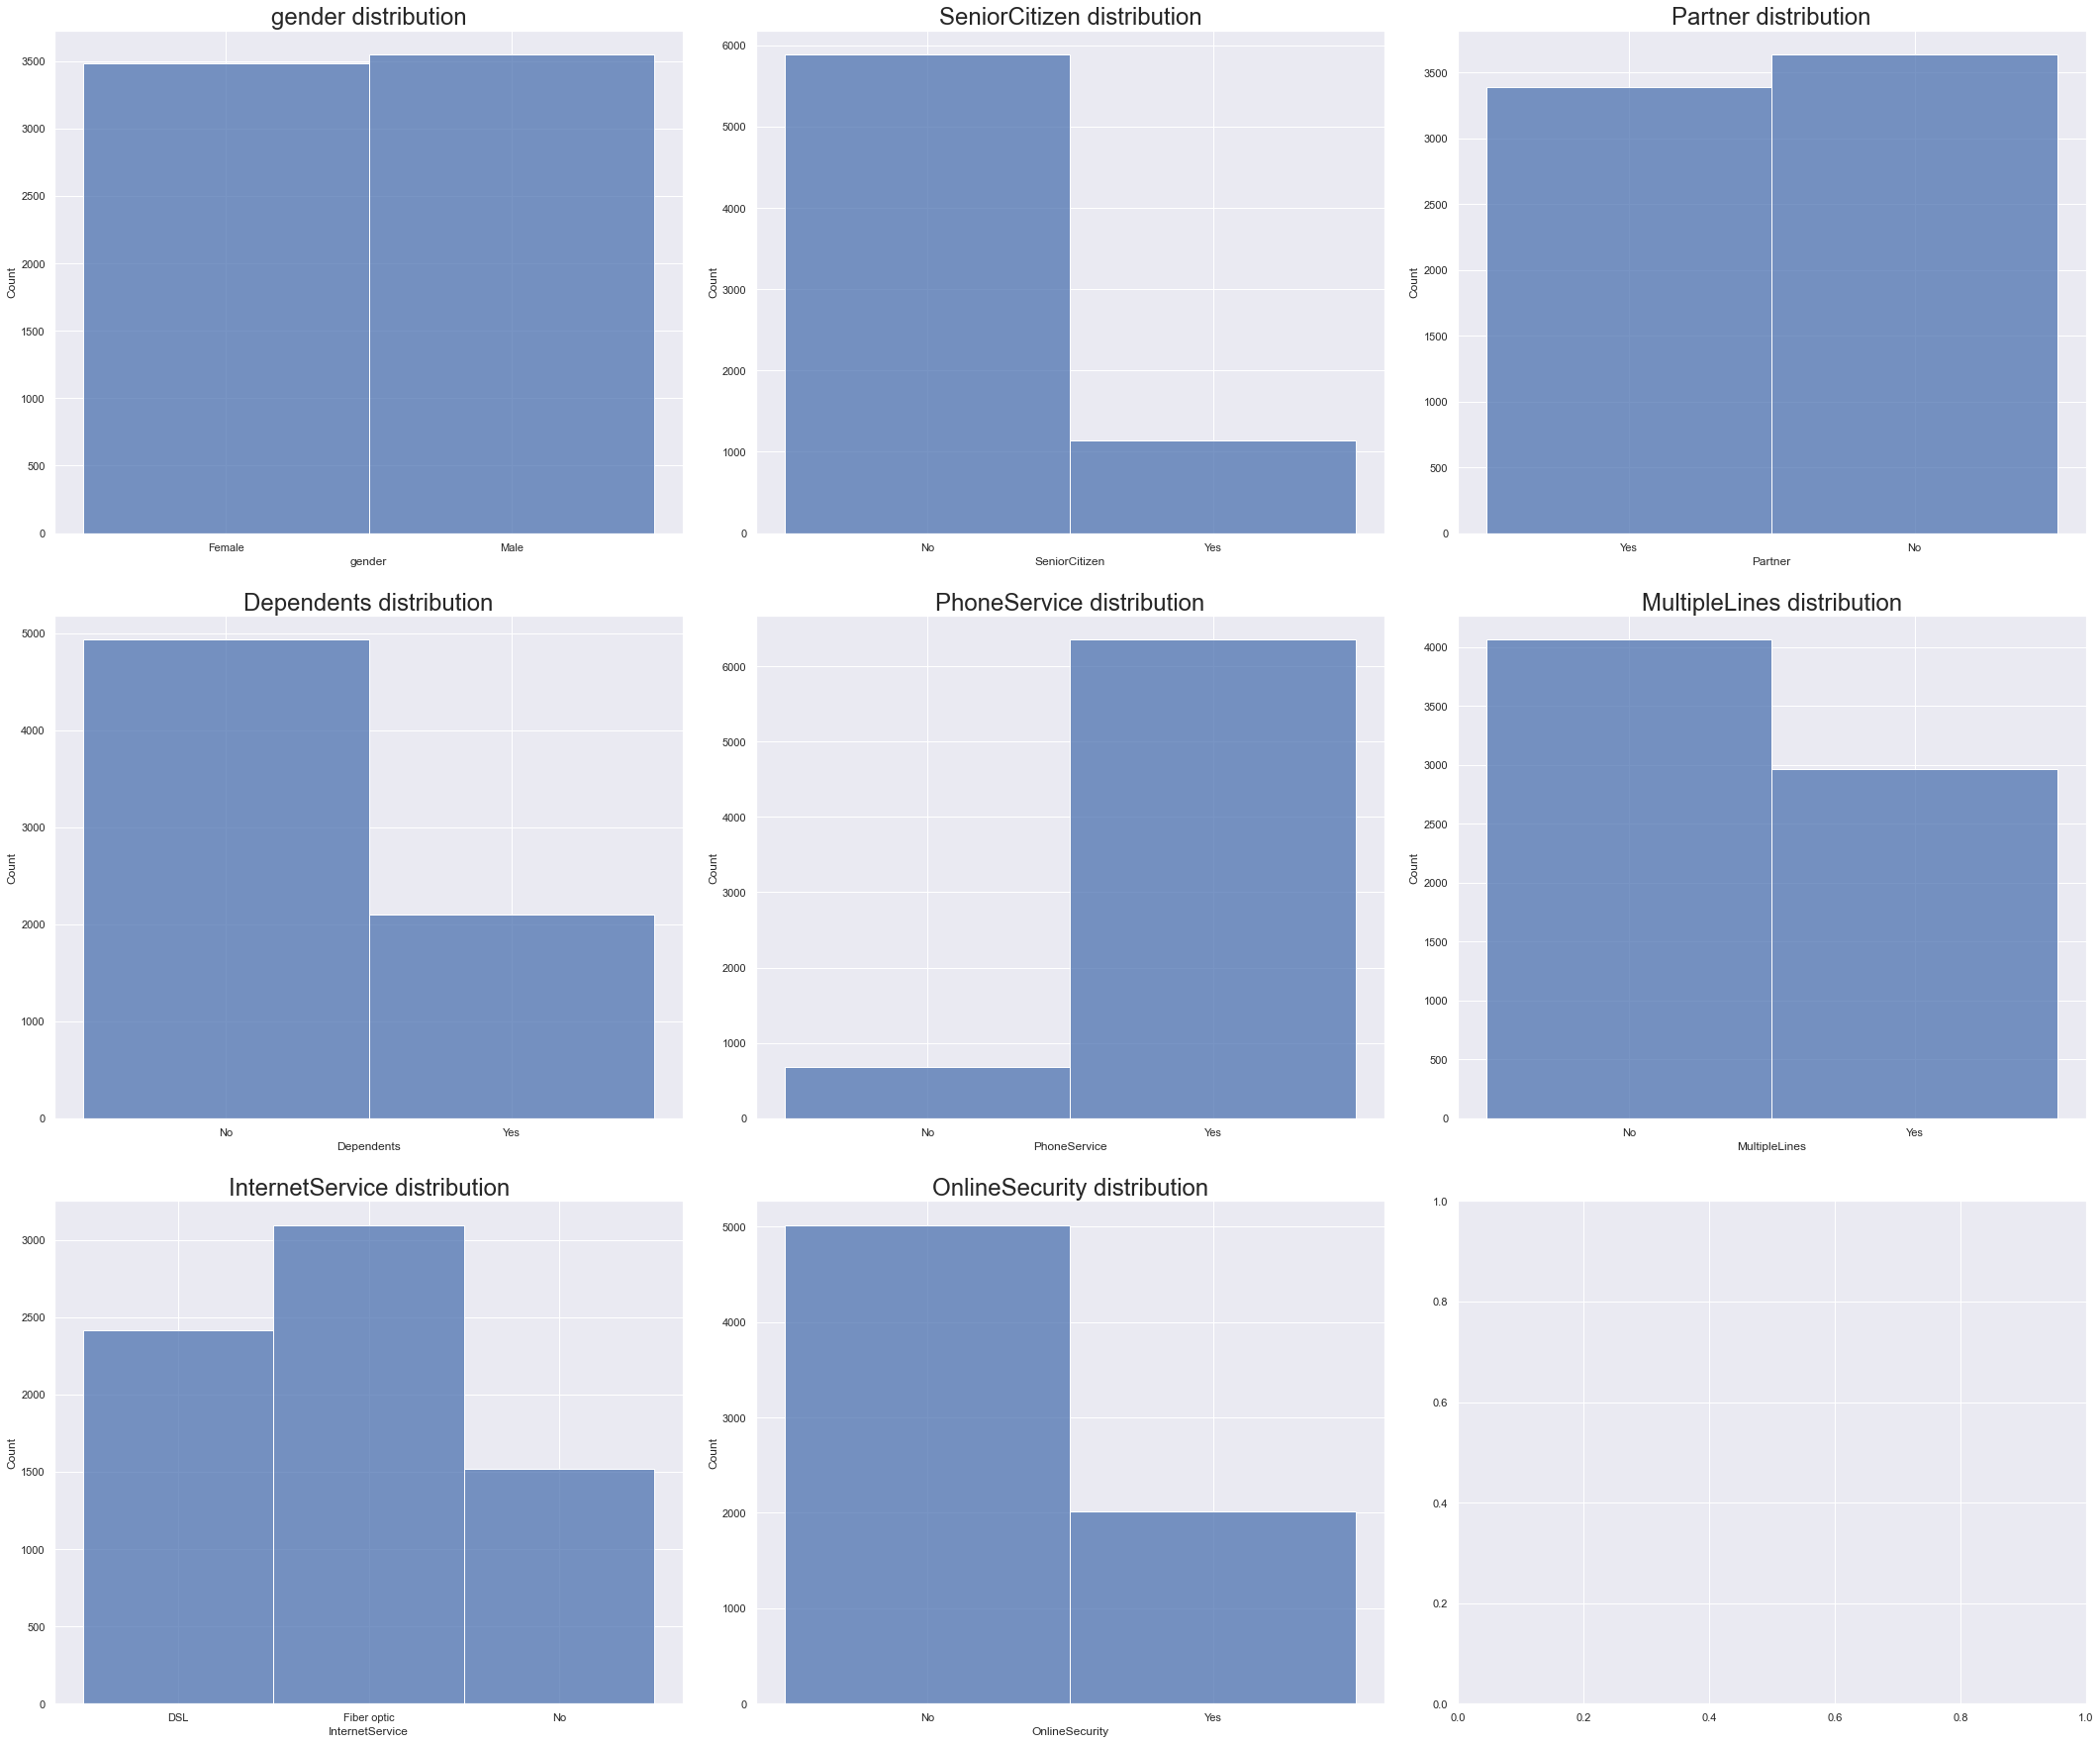

In [234]:
fig, axs = plt.subplots(3,3, figsize=(30, 25))
for count, column in enumerate(first_half, start=1):
    sns.set(font_scale = 2)
    plt.subplot(3, 3, count)
    plt.title(column + " distribution")
    sns.histplot(df, x = column)
    plt.tight_layout()
plt.show()

#### Inferences:

1. Number of males and females is approx. equal.
2. Most of the customers are not senior citizens.
3. Number of customers with and without a partner is approx. equal.
4. Most of the people are not dependents.
5. A vast majority have phone service.

### For the second half

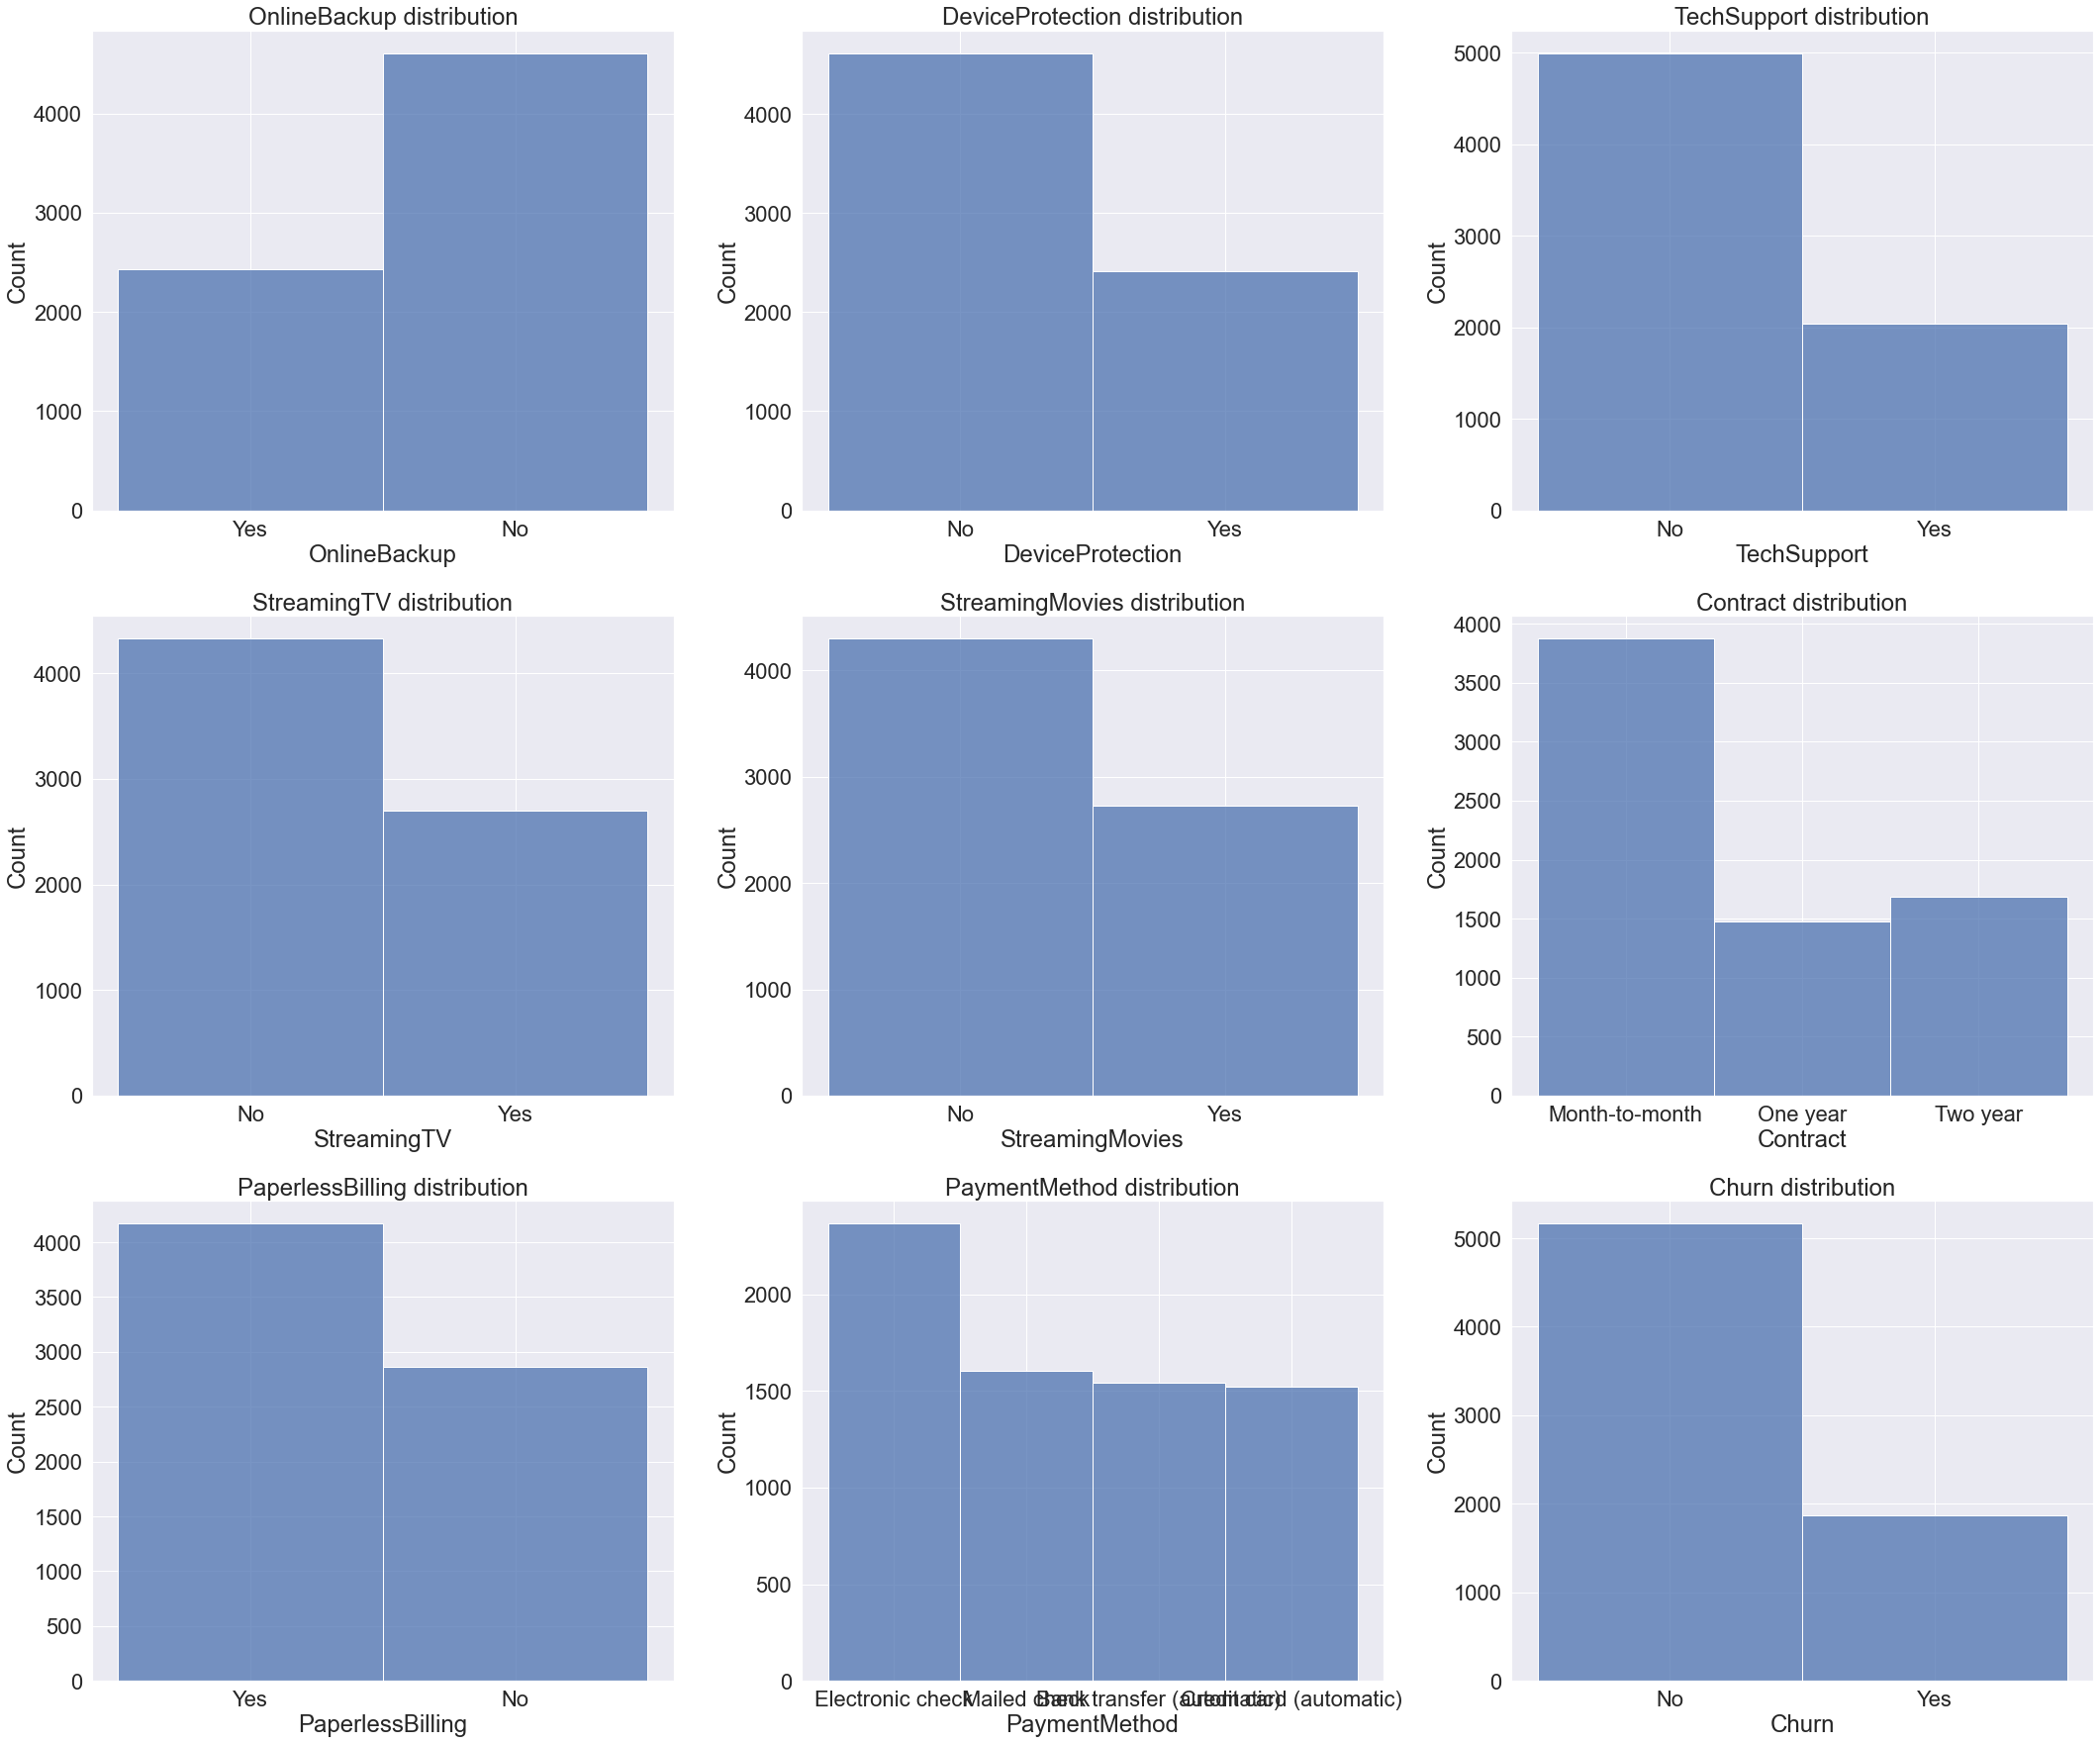

In [235]:
fig, axs = plt.subplots(3,3, figsize=(30, 25))
for count, column in enumerate(second_half, start=1):
    sns.set(font_scale = 2)
    plt.subplot(3, 3, count)
    plt.title(column + " distribution")
    sns.histplot(df, x = column)
    plt.tight_layout()
plt.show()

## Bivariate analysis

### Churn and tenure

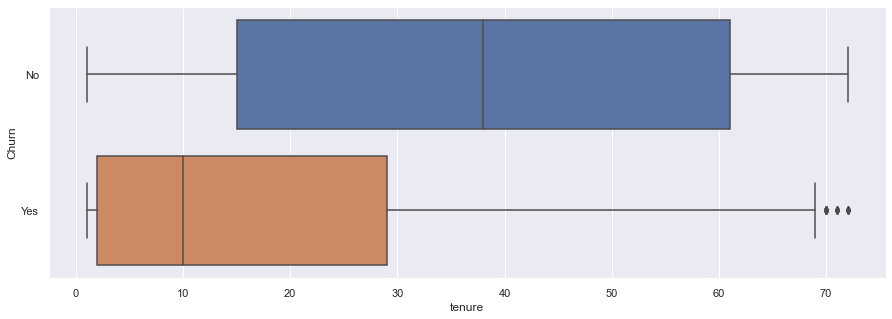

In [236]:
plt.figure(figsize = (15, 5))
sns.set(font_scale = 1)
sns.boxplot(data = df, y = 'Churn', x = 'tenure', orient = 'h')
plt.show()

#### Inference:

It can be observed that people who churn usually have a low value of tenure.

### Churn and TotalCharges

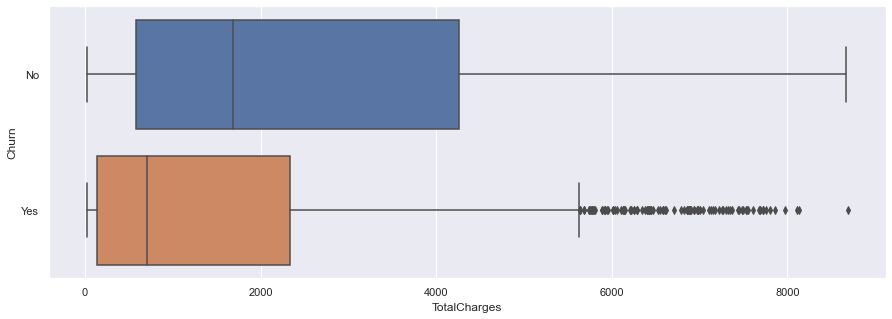

In [237]:
plt.figure(figsize = (15, 5))
sns.set(font_scale = 1)
sns.boxplot(data = df, y = 'Churn', x = 'TotalCharges', orient = "h")
plt.show()

### Churn and MonthlyCharges

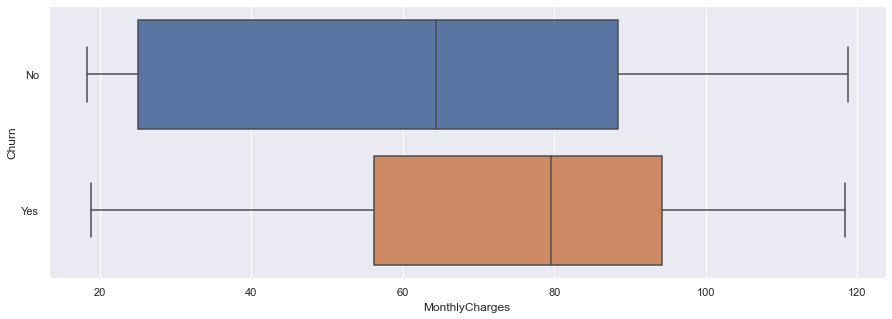

In [238]:
plt.figure(figsize = (15, 5))
sns.set(font_scale = 1)
sns.boxplot(data = df, y = 'Churn', x = 'MonthlyCharges', orient = "h")
plt.show()

Most of the people who churned had higher Monthly Charges

## Scatterplots of numeric features

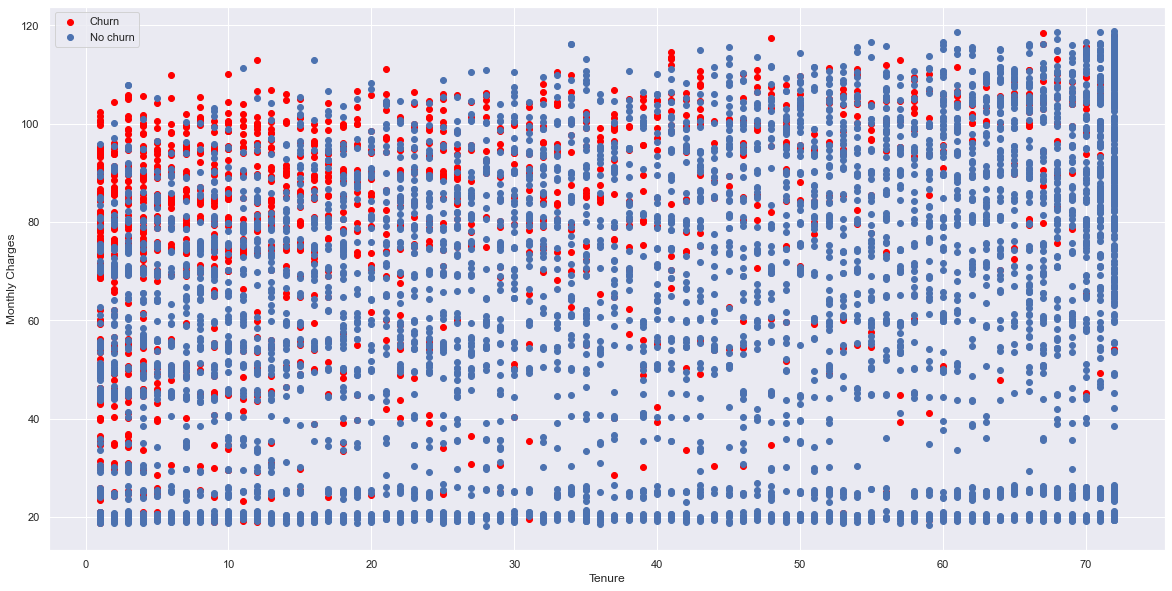

In [239]:
plt.figure(figsize = (20, 10))
sns.set(font_scale = 1)
plt.scatter(x = df.tenure[df.Churn == 'Yes'], y = df.MonthlyCharges[df.Churn == 'Yes'], c = 'red')
plt.scatter(x = df.tenure[df.Churn == 'No'], y = df.MonthlyCharges[df.Churn == 'No'])
plt.legend(["Churn", "No churn"])
plt.xlabel("Tenure")
plt.ylabel("Monthly Charges")
plt.show()

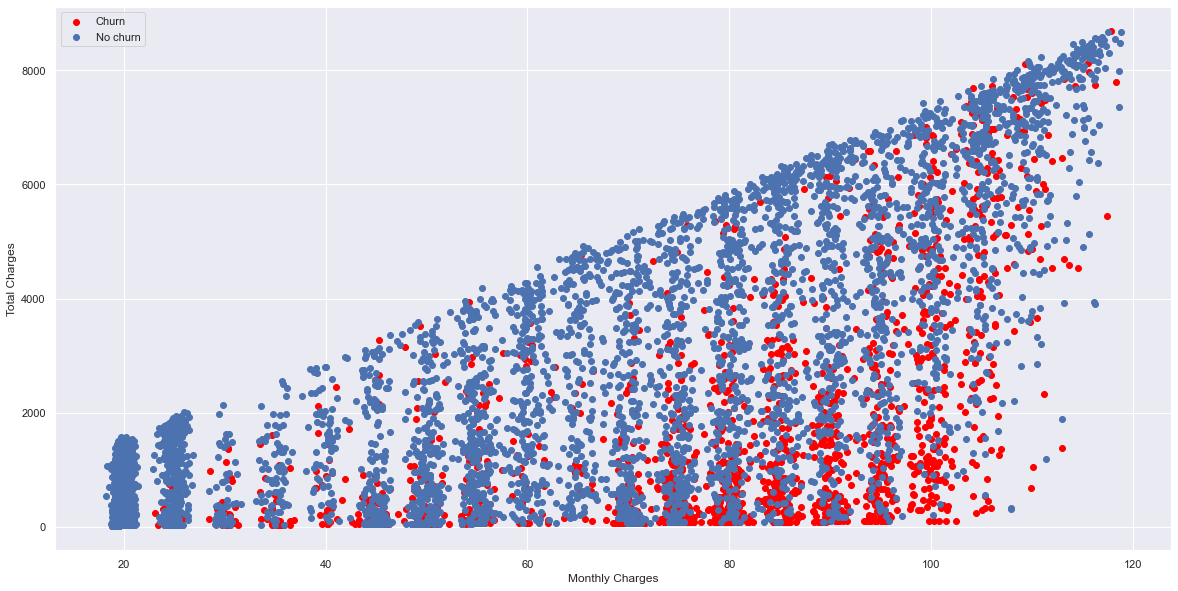

In [240]:
plt.figure(figsize = (20, 10))
sns.set(font_scale = 1)
plt.scatter(y = df.TotalCharges[df.Churn == 'Yes'], x = df.MonthlyCharges[df.Churn == 'Yes'], c = 'red')
plt.scatter(y = df.TotalCharges[df.Churn == 'No'], x = df.MonthlyCharges[df.Churn == 'No'])
plt.legend(["Churn", "No churn"])
plt.xlabel("Monthly Charges")
plt.ylabel("Total Charges")
plt.show()

### Churn and Gender

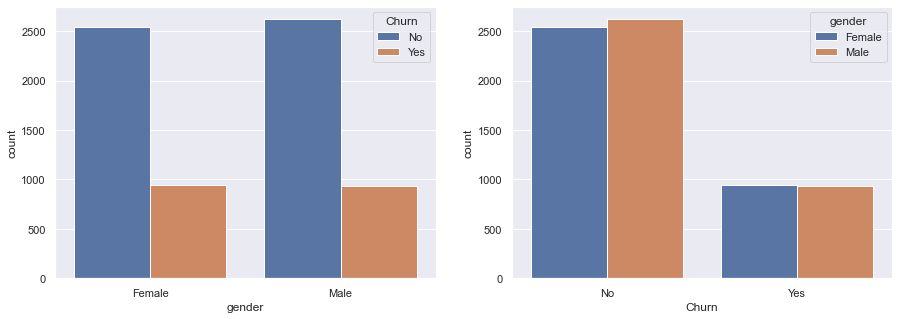

In [241]:
fig, axs = plt.subplots(1,2, figsize = (15, 5))
sns.set(font_scale = 1)
plt.subplot(1, 2, 1)
sns.countplot(data = df, x = 'gender', hue = 'Churn')
plt.subplot(1, 2, 2)
sns.countplot(data = df, hue = 'gender', x = 'Churn')
plt.show()

#### Inference:
There doesn't seem to be a relation between gender and churn rate.

### Churn and SeniorCitizen

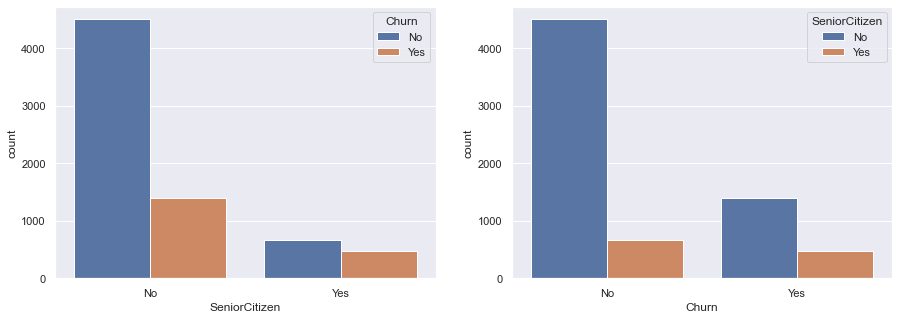

In [242]:
fig, axs = plt.subplots(1,2, figsize = (15, 5))
sns.set(font_scale = 1)
plt.subplot(1, 2, 1)
sns.countplot(data = df, x = 'SeniorCitizen', hue = 'Churn')
plt.subplot(1, 2, 2)
sns.countplot(data = df, hue = 'SeniorCitizen', x = 'Churn')
plt.show()

#### Inferences:

1. People who are not senior citizens are less likely to churn than those who are.
2. Non-churners are likely to be of the younger age group.

### Churn and Partner

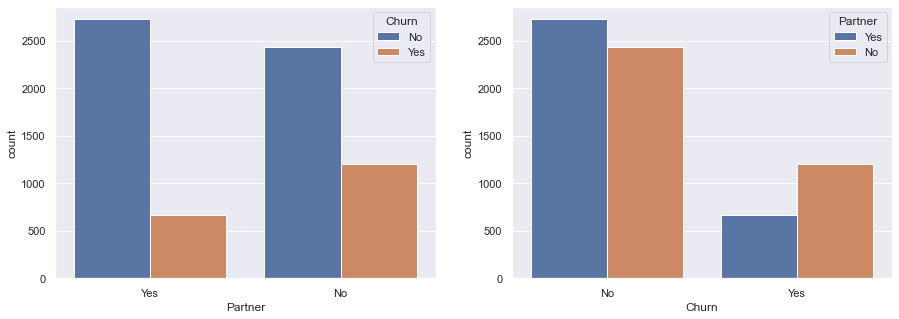

In [243]:
fig, axs = plt.subplots(1,2, figsize = (15, 5))
sns.set(font_scale = 1)
plt.subplot(1, 2, 1)
sns.countplot(data = df, x = 'Partner', hue = 'Churn')
plt.subplot(1, 2, 2)
sns.countplot(data = df, hue = 'Partner', x = 'Churn')
plt.show()

#### Inferences:

1. People without a partner are comparatively more likely to churn than those with one.
2. Most churners do not have a partner.

### Churn and Dependents

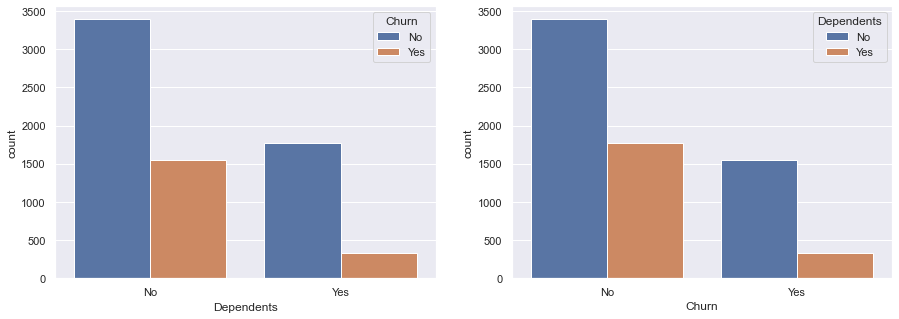

In [244]:
fig, axs = plt.subplots(1,2, figsize = (15, 5))
sns.set(font_scale = 1)
plt.subplot(1, 2, 1)
sns.countplot(data = df, x = 'Dependents', hue = 'Churn')
plt.subplot(1, 2, 2)
sns.countplot(data = df, hue = 'Dependents', x = 'Churn')
plt.show()

#### Inferences:

1. Doesn't seem to be a clear relation between dependent people and churn.
2. Most churners are not dependent.

### Churn and PhoneService

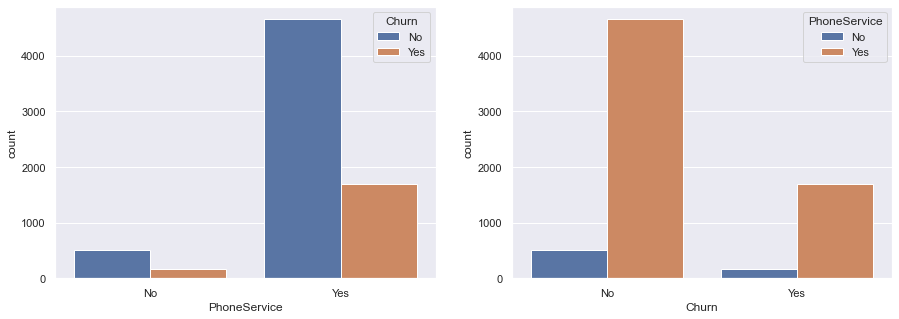

In [245]:
fig, axs = plt.subplots(1,2, figsize = (15, 5))
sns.set(font_scale = 1)
plt.subplot(1, 2, 1)
sns.countplot(data = df, x = 'PhoneService', hue = 'Churn')
plt.subplot(1, 2, 2)
sns.countplot(data = df, hue = 'PhoneService', x = 'Churn')
plt.show()

### Churn and MultipleLines

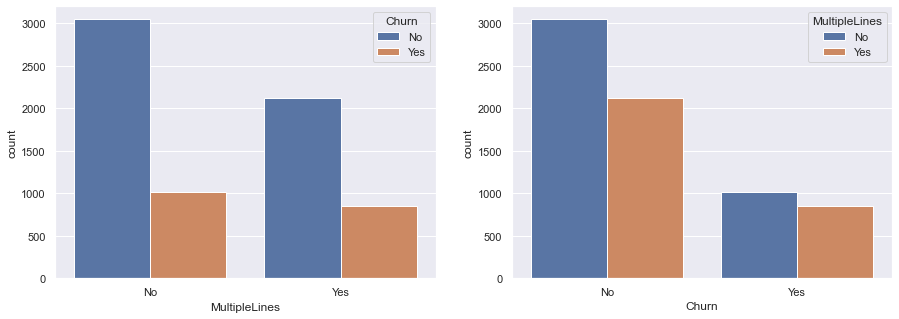

In [246]:
fig, axs = plt.subplots(1,2, figsize = (15, 5))
sns.set(font_scale = 1)
plt.subplot(1, 2, 1)
sns.countplot(data = df, x = 'MultipleLines', hue = 'Churn')
plt.subplot(1, 2, 2)
sns.countplot(data = df, hue = 'MultipleLines', x = 'Churn')
plt.show()

#### Inferences:

Customers with multiple lines have a slightly higher churn rate.

### Churn and InternetService

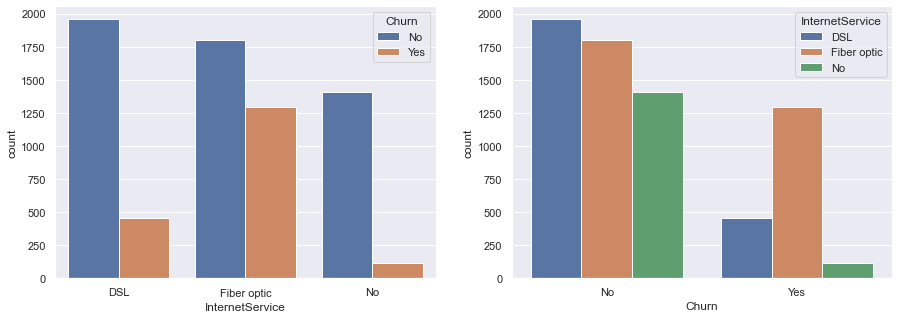

In [247]:
fig, axs = plt.subplots(1,2, figsize = (15, 5))
sns.set(font_scale = 1)
plt.subplot(1, 2, 1)
sns.countplot(data = df, x = 'InternetService', hue = 'Churn')
plt.subplot(1, 2, 2)
sns.countplot(data = df, hue = 'InternetService', x = 'Churn')
plt.show()

#### Inferences:

1. Customers with fibre optic have a high churn rate.
2. Customers without internet have a very low churn rate.

### Additional Services

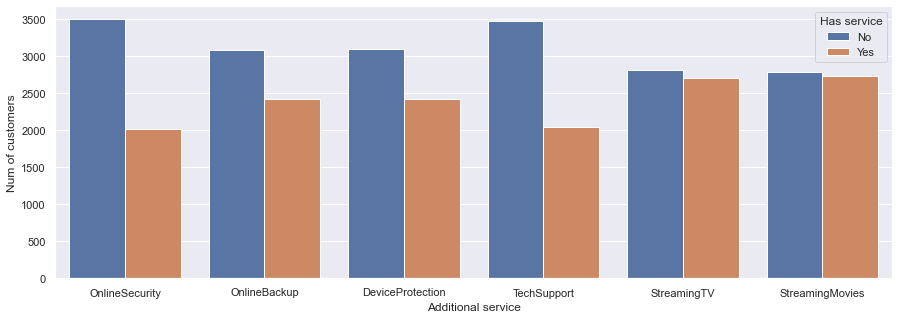

In [248]:
cols = ["OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]
df1 = pd.melt(df[df["InternetService"] != "No"][cols]).rename({'value': 'Has service'}, axis=1)
plt.figure(figsize=(15, 5))
ax = sns.countplot(data=df1, x='variable', hue='Has service')
ax.set(xlabel='Additional service', ylabel='Num of customers')
plt.show()

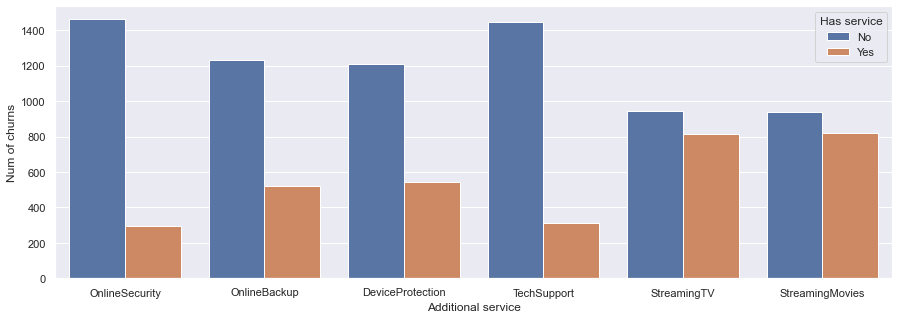

In [249]:
plt.figure(figsize=(15, 5))
df1 = df[(df['InternetService'] != "No") & (df.Churn == "Yes")]
df1 = pd.melt(df1[cols]).rename({'value': 'Has service'}, axis=1)
ax = sns.countplot(data=df1, x='variable', hue='Has service', hue_order=['No', 'Yes'])
ax.set(xlabel='Additional service', ylabel='Num of churns')
plt.show()

#### Inferences:

Most customers WITHOUT the additional services (except Streaming TV and movies) have a low churn rate.

### Churn and Contract

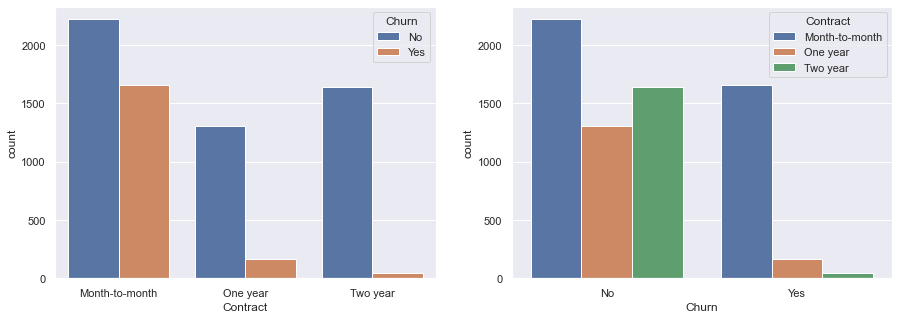

In [250]:
fig, axs = plt.subplots(1,2, figsize = (15, 5))
sns.set(font_scale = 1)
plt.subplot(1, 2, 1)
sns.countplot(data = df, x = 'Contract', hue = 'Churn')
plt.subplot(1, 2, 2)
sns.countplot(data = df, hue = 'Contract', x = 'Churn')
plt.show()

#### Inferences:

1. Customers who have a one or two year contract have a very low churn rate.
2. Majority of the churners have a month-to-month contract.

### Churn and Payment

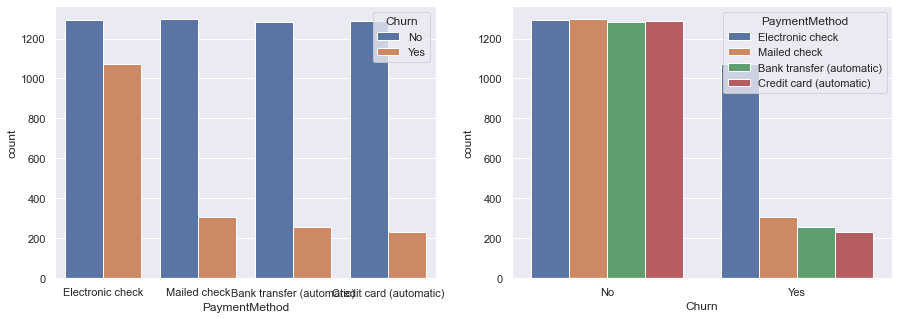

In [251]:
fig, axs = plt.subplots(1,2, figsize = (15, 5))
sns.set(font_scale = 1)
plt.subplot(1, 2, 1)
sns.countplot(data = df, x = 'PaymentMethod', hue = 'Churn')
plt.subplot(1, 2, 2)
sns.countplot(data = df, hue = 'PaymentMethod', x = 'Churn')
plt.show()

#### Inferences:

1. Customers who pay via electronic cheque have a high churn rate.
2. Customers who pay via other methods have a significantly lower churn rate.
3. Majority of the churners pay via electronic cheque.
4. Most of the customers prefer to pay by electronic cheque.

### Paperless billing

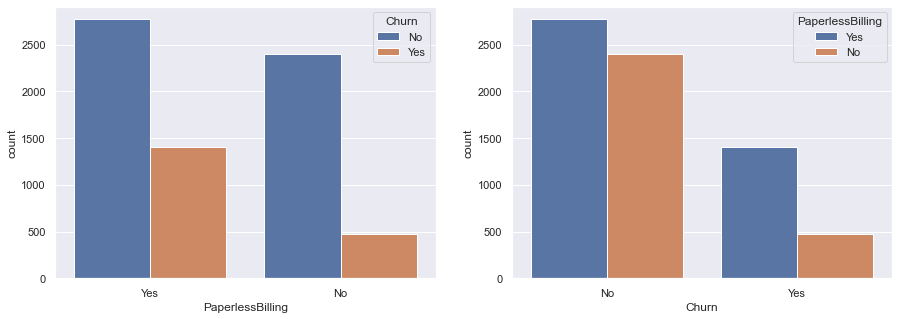

In [252]:
fig, axs = plt.subplots(1,2, figsize = (15, 5))
sns.set(font_scale = 1)
plt.subplot(1, 2, 1)
sns.countplot(data = df, x = 'PaperlessBilling', hue = 'Churn')
plt.subplot(1, 2, 2)
sns.countplot(data = df, hue = 'PaperlessBilling', x = 'Churn')
plt.show()

#### Inferences:

1. Most customers pay via paper-less billing.
2. These customers however have a high churn rate.

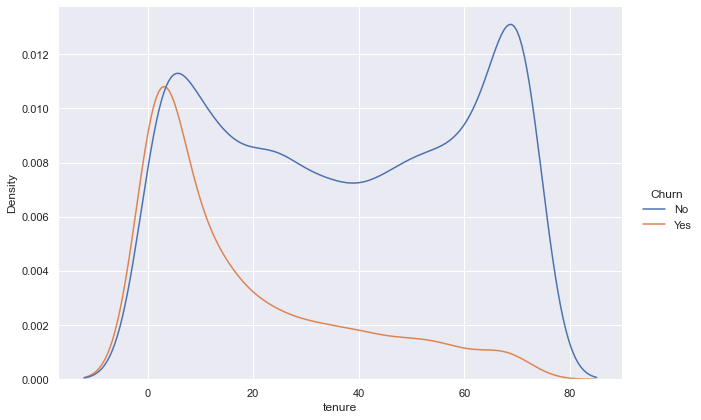

In [253]:
#fig, axs = plt.subplots(1, 1, figsize = (15, 5))
# df['tenure'].plot.kde()
#plt.subplot(1, 1, 1)
sns.displot(data = df, x = 'tenure', hue = 'Churn', kind = 'kde', height = 6, aspect = 1.5)
sns.set(rc = {'figure.figsize':(20,8)})
plt.show()

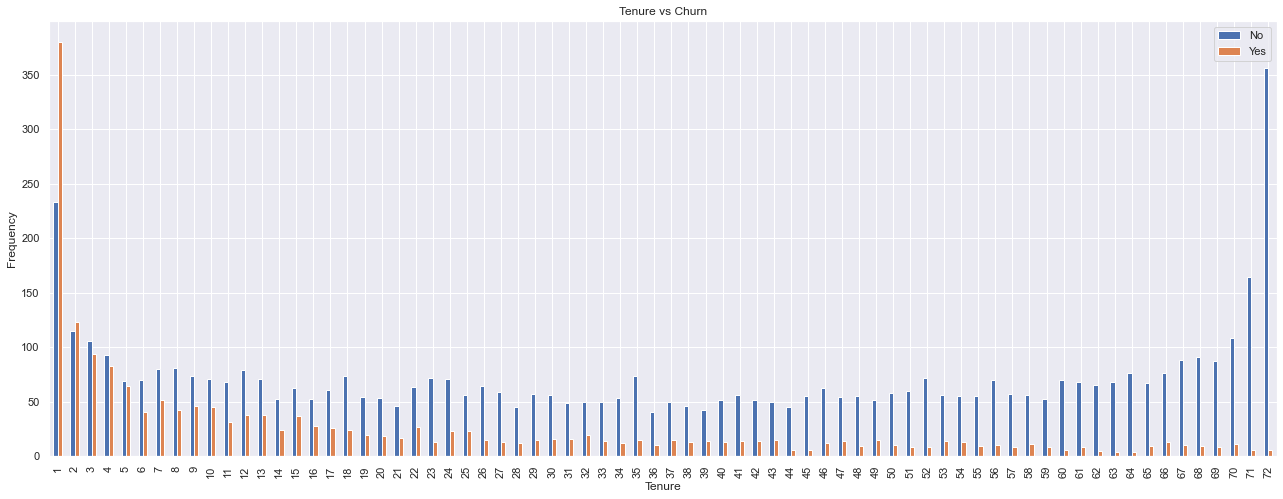

In [254]:
pd.crosstab(df.tenure.astype(int), df.Churn).plot(kind="bar",figsize=(22,8))
plt.title('Tenure vs Churn')
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.legend(["No", "Yes"])
plt.show()

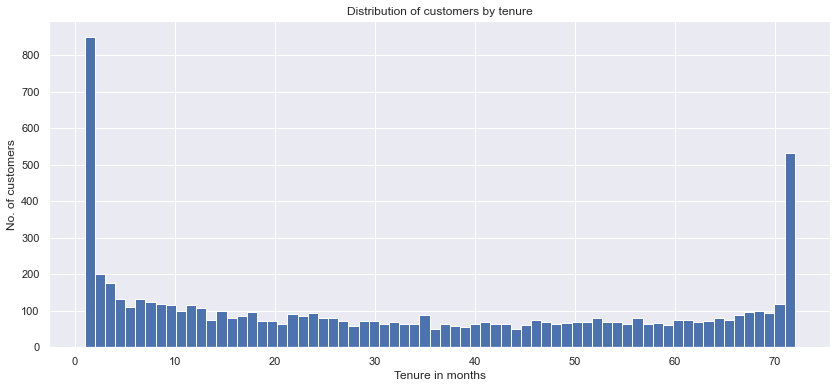

In [255]:
plt.figure(figsize = (14, 6))
df['tenure'].plot.hist(bins = 70)
plt.title('Distribution of customers by tenure')
plt.xlabel('Tenure in months')
plt.ylabel('No. of customers')
plt.show()

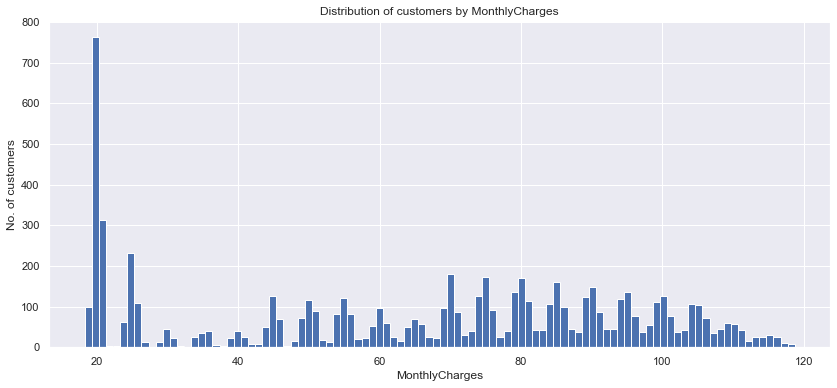

In [256]:
plt.figure(figsize = (14, 6))
df['MonthlyCharges'].plot.hist(bins = 100)
plt.title('Distribution of customers by MonthlyCharges')
plt.xlabel('MonthlyCharges')
plt.ylabel('No. of customers')
plt.show()

### To be done: graphs for continuous features

#### (Visualisation ends here)

### Convert churn from object to number.

In [257]:
df['Churn'].replace({'Yes' : 1, 'No' : 0}, inplace = True)

## Heatmap between continous and categorical variables

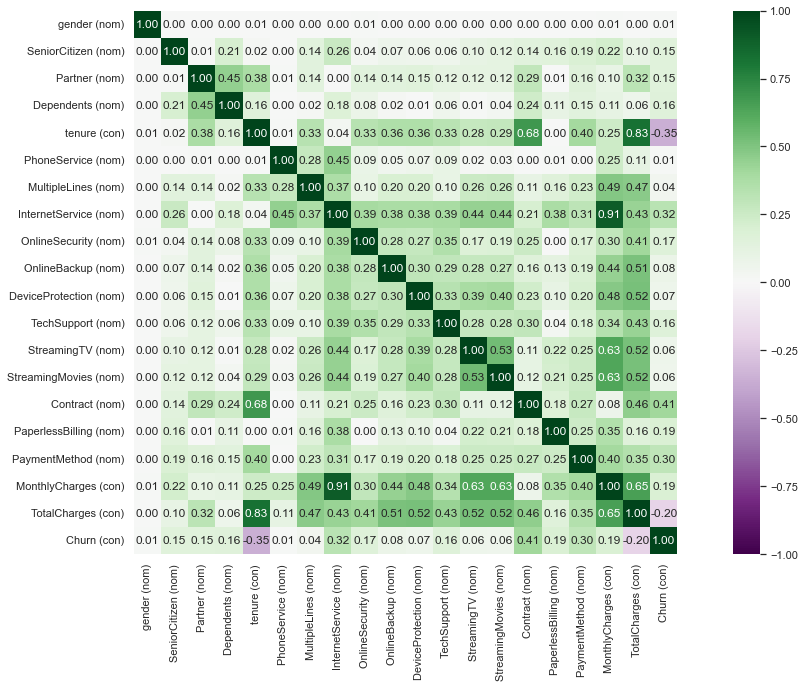

In [258]:
from dython import nominal
sns.set(font_scale = 1)
nominal.associations(df,figsize=(20,10),mark_columns=True, cmap = 'PRGn');

### Correlation between churn and numeric features.

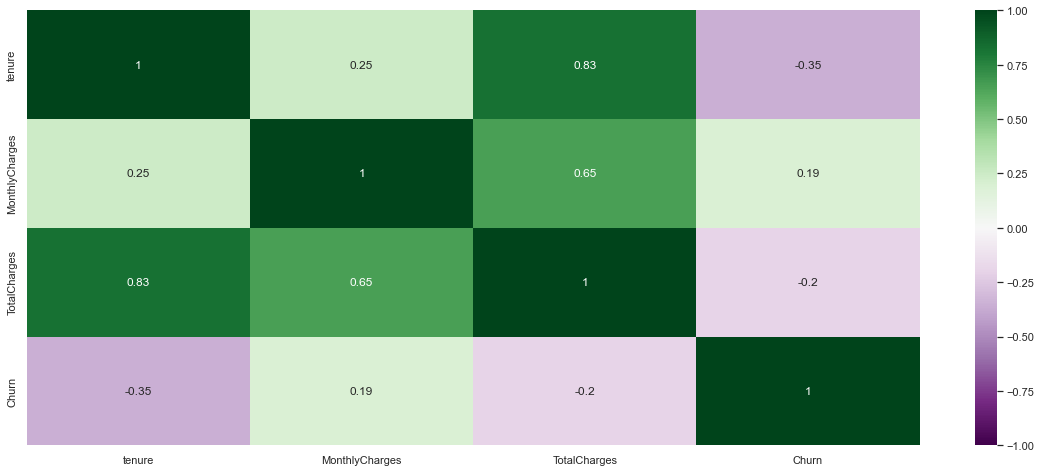

In [259]:
corr = df.corr()
sns.heatmap(corr, vmax = 1, vmin = -1, annot = True, cmap = 'PRGn', square = True)
plt.show()

## Heatmap with dummy variables.

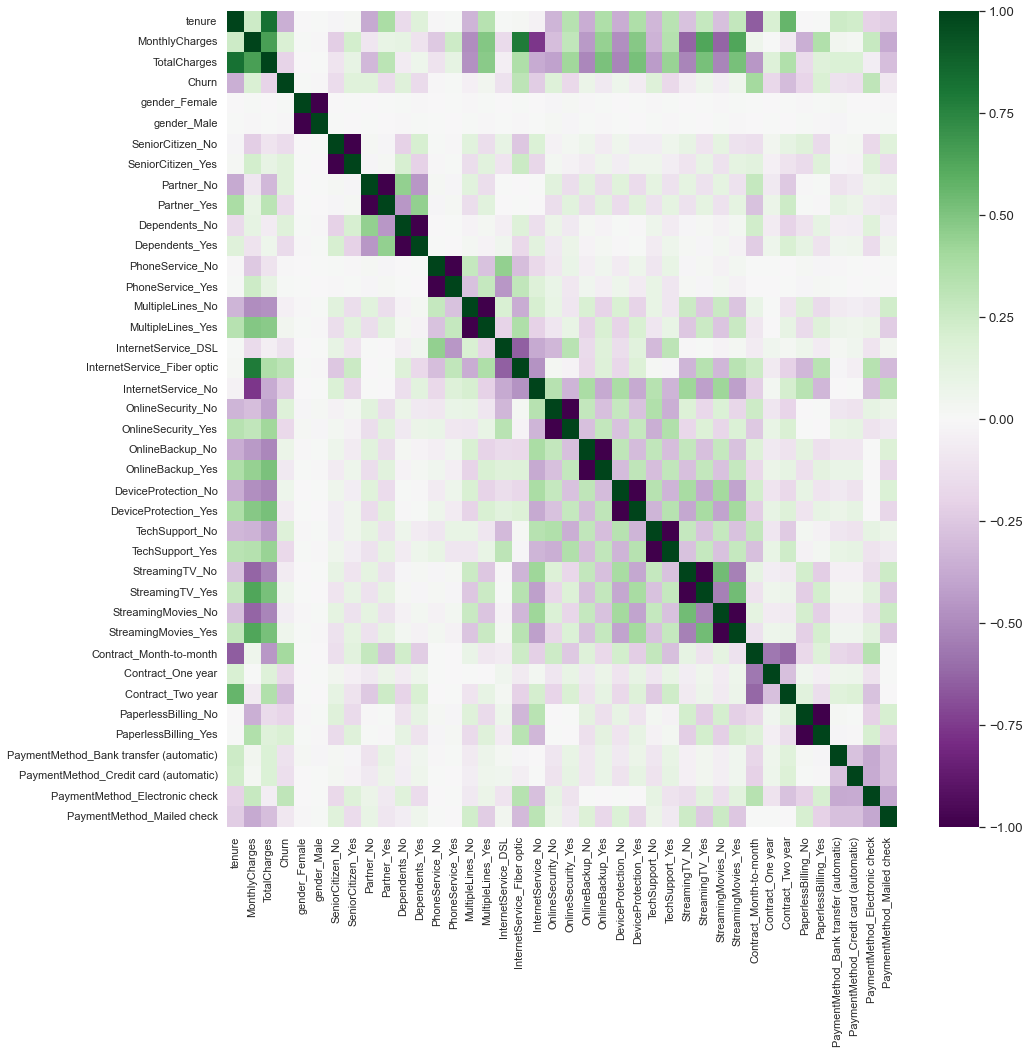

In [260]:
df_dummy = pd.get_dummies(df)
corr_dummy = df_dummy.corr()
fig, ax = plt.subplots(1, 1, figsize = (15, 15))
sns.set(font_scale = 1.2)
xticks = df.index
plt.xticks(rotation = 45)
map = sns.heatmap(corr_dummy, vmin = -1, vmax = 1, cmap = 'PRGn')
# map.set_xticklabels(map.get_xticklabels(), rotation = -60)
plt.show()

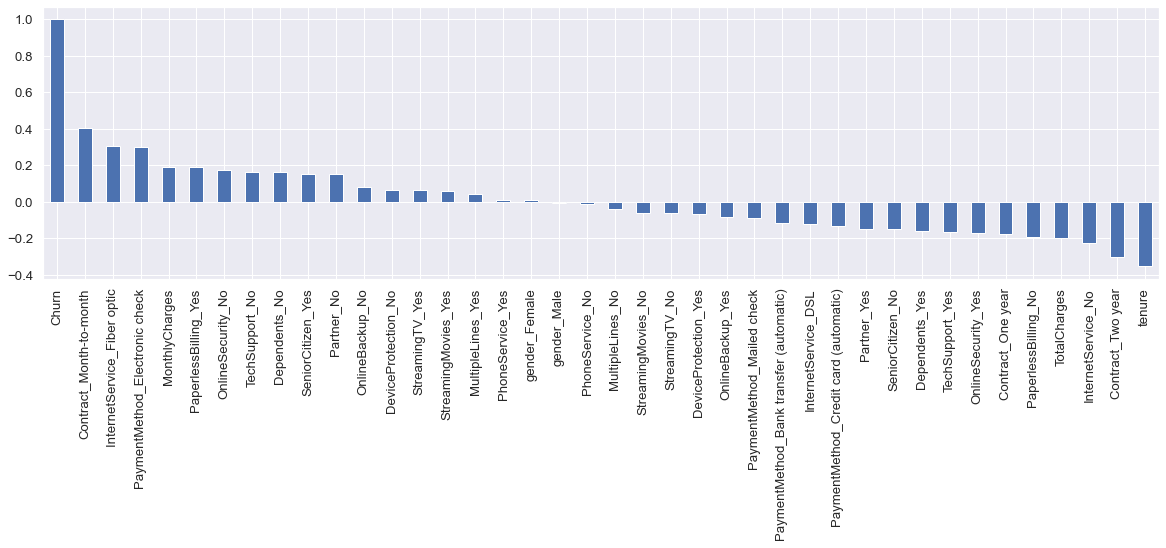

In [261]:
plt.figure(figsize = (20, 5))
df_dummy.corr()['Churn'].sort_values(ascending = False).plot(kind = 'bar')
plt.show()

### There seems to be little relation between genders and other features, so it's dropped.

In [262]:
df.drop('gender', inplace = True, axis = 1)

TotalCharges is a bit suspicious since it is approx equal to tenure * monthlyCharges

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


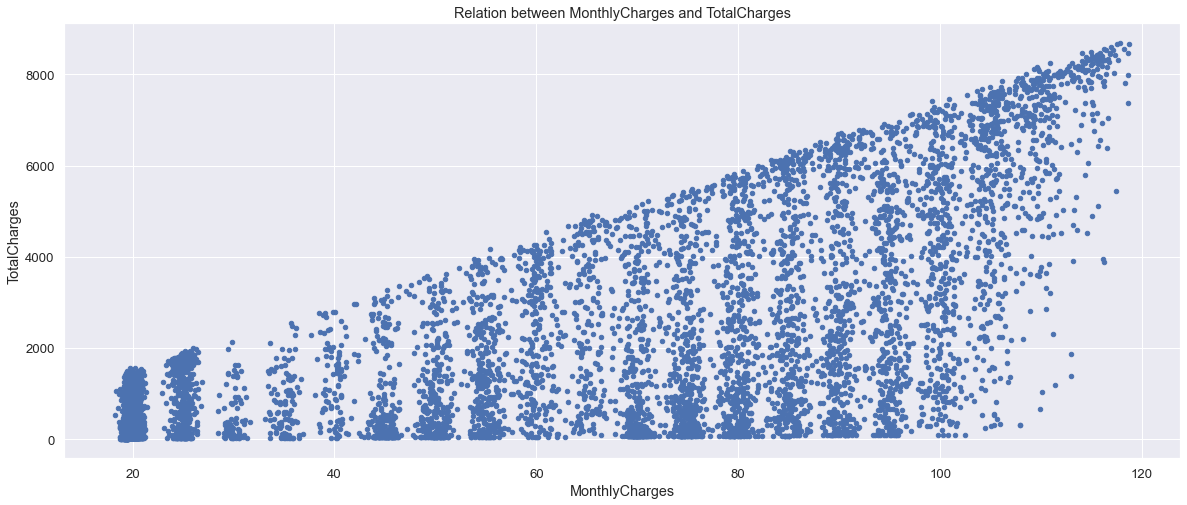

In [263]:
df[['MonthlyCharges', 'TotalCharges']].plot.scatter(
    figsize = (20, 8), x = 'MonthlyCharges', y = 'TotalCharges'
)
plt.title('Relation between MonthlyCharges and TotalCharges')
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


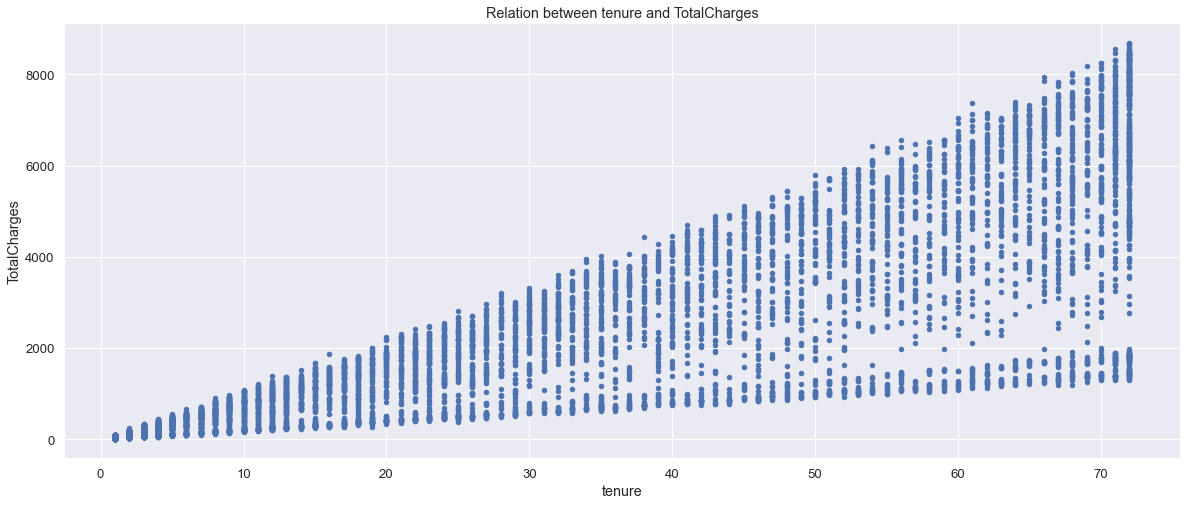

In [264]:
df[['tenure', 'TotalCharges']].plot.scatter(
    figsize = (20, 8), x = 'tenure', y = 'TotalCharges'
)
plt.title('Relation between tenure and TotalCharges')
plt.show()

Since monthly charges and total charges are collinear, the latter can be dropped.

In [265]:
df.drop('TotalCharges', axis = 1, inplace = True)

## Modelling

In [266]:
# Separate the features and the target. Then perfrom the train-test split

X = df.drop('Churn', axis = 1)
y = df.Churn

## Train-test split

In [267]:
X_train, X_test, y_train, y_test = train_test_split(
    X , y, test_size = 0.33, stratify = y, random_state = 42
)
X_train_org = X_train
y_train_org = y_train

## Display counts of training values of y

In [268]:
y_train.value_counts(normalize = True)

0    0.734239
1    0.265761
Name: Churn, dtype: float64

## Create numerical and categorical pipelines + Over/Undersampling

In [269]:
# # First, separate the numerical and categorical variables.

# num_features = X_train.select_dtypes(exclude = 'object').columns.tolist()
# cat_features = X_train.select_dtypes(include = 'object').columns.tolist()

# # Then, create the pipelines and the Column Transformer.

# num_pipeline = Pipeline(steps = [
#     ('scaler', MinMaxScaler())
# ])

# cat_pipeline = Pipeline(steps = [
#     ('encoder', OneHotEncoder())
#     # ('encoder', OrdinalEncoder())
# ])

# processor = ColumnTransformer(transformers = [
#     ('numerical', num_pipeline, num_features),
#     ('categorical', cat_pipeline, cat_features)
# ])
ordinal_columns, onehot_columns = list(), list()

cat_features = X_train.select_dtypes(include = 'object').columns.tolist()
num_features = X_train.select_dtypes(exclude = 'object').columns.tolist()

# Onehot encode attributes which have more than two unique values.
for col in cat_features:
    unique_values = df[col].nunique()
    if unique_values == 2:
        ordinal_columns.append(col)
    else:
        onehot_columns.append(col)

num_pipeline = Pipeline(steps = [
    ('scaler', MinMaxScaler())
])

onehot_pipeline = Pipeline(steps = [
    ('encoder', OneHotEncoder())
])

ordinal_pipeline = Pipeline(steps = [
    ('encoder', OrdinalEncoder())
])

processor = ColumnTransformer(transformers = [
    ('numerical', num_pipeline, num_features),
    ('onehot', onehot_pipeline, onehot_columns),
    ('ordinal', ordinal_pipeline, ordinal_columns)
])

cat_indices = [0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
sm = SMOTENC(cat_indices)
over = RandomOverSampler(sampling_strategy = 0.9)
under = RandomUnderSampler(sampling_strategy=0.999)

from imblearn.pipeline import Pipeline as Pipe

pipeline = Pipe(steps = [
    ('over', over),
    ('under', under)
    # ('SMOTE', sm)
])

X_train, y_train = pipeline.fit_resample(X_train_org, y_train_org)

In [270]:
# View class counts after over/undersampling

y_train.value_counts()

0    3116
1    3113
Name: Churn, dtype: int64

In [271]:
models = list()
models.append(('LR', LogisticRegression(class_weight='balanced')))
# models.append(('SGD', SGDClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('ADA', AdaBoostClassifier()))
models.append(('GB', GradientBoostingClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('XGB', XGBClassifier(verbosity = 0)))
models.append(('LGB', LGBMClassifier()))

## Cross validate

In [272]:
names = list()

cv_scores_df = pd.DataFrame(columns = ['Model', 'Accuracy', 'Balanced accuracy', 'Precision', 'Recall', 'F1', 'F2', 'ROC_AUC'])

metrics = {
    'accuracy' : 'accuracy',
    'balanced_accuracy' : 'balanced_accuracy',
    'precision' : 'precision',
    'recall' : 'recall',
    'f1' : 'f1',
    'f2' : make_scorer(fbeta_score, beta = 2),
    'roc_auc' : 'roc_auc'
}
acc_score, b_acc_score, prec_score, reca_score, f1_scores, f2_score, roc_score = list(), list(), list(), list(), list(), list(), list()

for index, (name, model) in enumerate(models):
    pipeline = Pipeline(steps = [
        ('processor', processor),
        (name, model)
    ])

    start = time.perf_counter()

    kfold = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 5, random_state = 314)
    scores = cross_validate(pipeline, X, y, scoring = metrics, cv = kfold)

    end = time.perf_counter()

    accuracy = scores['test_accuracy']
    bal_accuracy = scores['test_balanced_accuracy']
    precision = scores['test_precision']
    recall = scores['test_recall']
    f1 = scores['test_f1']
    roc = scores['test_roc_auc']
    f2 = scores['test_f2']

    acc_score.append(accuracy)
    b_acc_score.append(bal_accuracy)
    prec_score.append(precision)
    reca_score.append(recall)
    f1_scores.append(f1)
    f2_score.append(f2)
    roc_score.append(roc)
    names.append(name)

    acc_string = f'{accuracy.mean():.6f} \n ({accuracy.std():.6f})'
    bal_acc_string = f'{bal_accuracy.mean():.6f} \n ({bal_accuracy.std():.6f})'
    prec_string = f'{precision.mean():.6f} \n ({precision.std():.6f})'
    rec_string = f'{recall.mean():.6f} \n ({recall.std():.6f})'
    f1_string = f'{f1.mean():.6f}  \n ({f1.std():.6f})'
    f2_string = f'{f2.mean():.6f} \n ({f2.std():.6f})'
    roc_string = f'{roc.mean():.6f} \n ({roc.std():.6f})'

    print(f'{name} has been trained!')
    time_taken = end - start
    print(f'Time taken to cross-validate: {time_taken:.2f} seconds.\n')

    cv_scores_df.loc[index] = [name, acc_string, bal_acc_string, prec_string, rec_string, f1_string, f2_string, roc_string]
    
    # print(f'For {name}:')
    # print(f'Accuracy          = {accuracy.mean():.6f} ({accuracy.std():.6f})')
    # print(f'Balanced accuracy = {bal_accuracy.mean():.6f} ({bal_accuracy.std():.6f})')
    # print(f'Precision         = {precision.mean():.6f} ({precision.std():.6f})')
    # print(f'Recall            = {recall.mean():.6f} ({recall.std():.6f})')
    # print(f'F1                = {f1.mean():.6f} ({f1.std():.6f})')
    # print(f'F2                = {f2.mean():.6f} ({f2.std():.6f})')
    # print(f'ROC_AUC           = {roc.mean():.6f} ({roc.std():.6f})\n')

NameError: name 'time' is not defined

In [ ]:
pretty_print(cv_scores_df)

,Model,Accuracy,Balanced accuracy,Precision,Recall,F1,F2,ROC_AUC
0,LR,0.749089 (0.016395),0.763588 (0.017599),0.518743 (0.020907),0.794537 (0.029075),0.627428 (0.020864),0.717933 (0.023667),0.843533 (0.017276)
1,KNN,0.760237 (0.014427),0.680852 (0.019705),0.553431 (0.030221),0.511381 (0.038212),0.530983 (0.030204),0.518917 (0.034492),0.772964 (0.017441)
2,CART,0.730401 (0.016089),0.659989 (0.020925),0.493244 (0.029255),0.509673 (0.035708),0.501052 (0.030378),0.506122 (0.033126),0.661872 (0.021092)
3,GNB,0.745420 (0.018376),0.755561 (0.018704),0.514666 (0.023695),0.777203 (0.030866),0.618903 (0.022570),0.704919 (0.025011),0.830496 (0.016518)
4,SVM,0.797183 (0.012968),0.703971 (0.018694),0.654017 (0.032671),0.504977 (0.036435),0.569216 (0.030169),0.528733 (0.033812),0.798432 (0.023431)
5,ADA,0.802302 (0.014650),0.716944 (0.019909),0.658583 (0.036735),0.534720 (0.037376),0.589486 (0.031433),0.555226 (0.034572),0.846740 (0.016317)
6,GB,0.802359 (0.015843),0.713057 (0.022049),0.663384 (0.039287),0.522413 (0.040253),0.583831 (0.035458),0.545242 (0.038072),0.847138 (0.017136)
7,RF,0.780487 (0.014631),0.683615 (0.020466),0.611957 (0.035346),0.476817 (0.036894),0.535518 (0.033963),0.498602 (0.035658),0.814896 (0.018924)
8,XGB,0.786773 (0.015550),0.702410 (0.020693),0.617648 (0.036458),0.522309 (0.037895),0.565329 (0.032605),0.538584 (0.035373),0.826248 (0.018127)
9,LGB,0.794367 (0.014389),0.707104 (0.021249),0.639270 (0.033688),0.520810 (0.040935),0.573292 (0.033815),0.540481 (0.037984),0.836835 (0.018429)


## Function to plot results

In [ ]:
def boxplot(metric, scores):
    fig = plt.figure(figsize = (22, 6))
    fig.suptitle(f'Algorithm Comparison ({metric})')
    ax = fig.add_subplot(111)
    plt.boxplot(scores, labels = names, showmeans = True)
    ax.set_xticklabels(names)
    plt.show()

### Accuracy plot

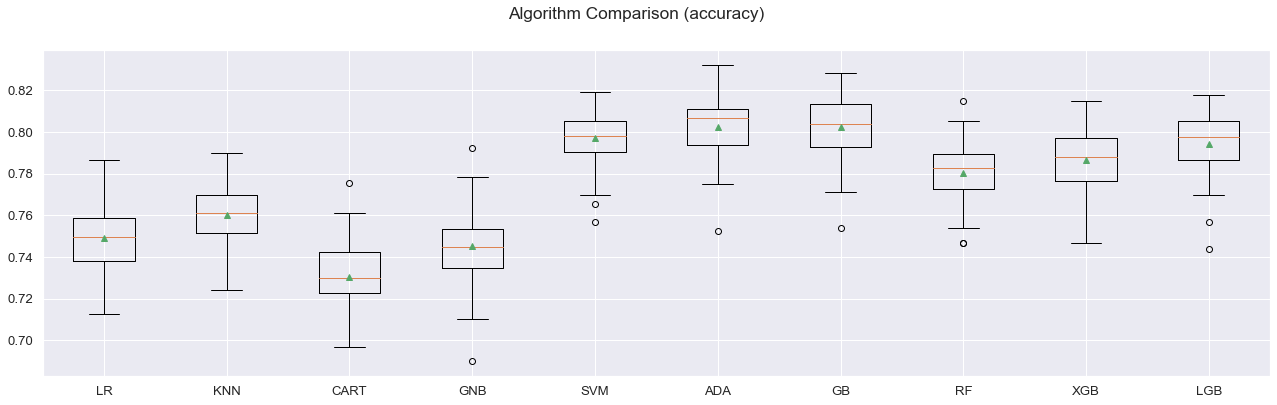

In [ ]:
boxplot('accuracy', acc_score)

### Precision plot

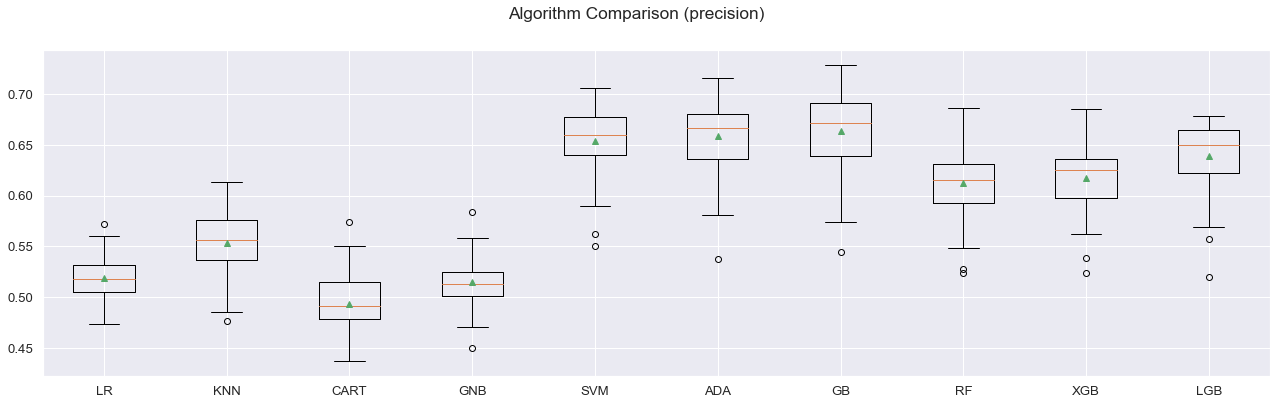

In [ ]:
boxplot('precision', prec_score)

### Recall plot

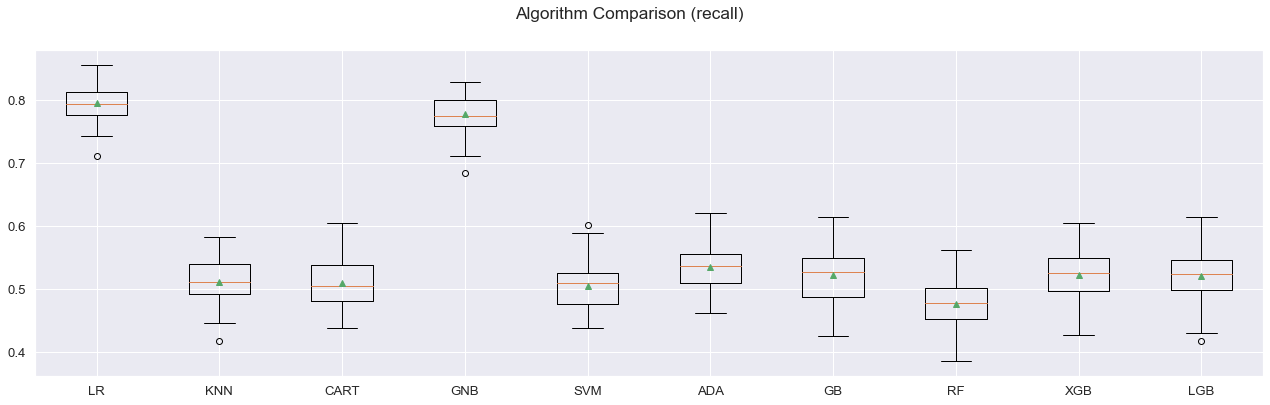

In [ ]:
boxplot('recall', reca_score)

### F1 plot

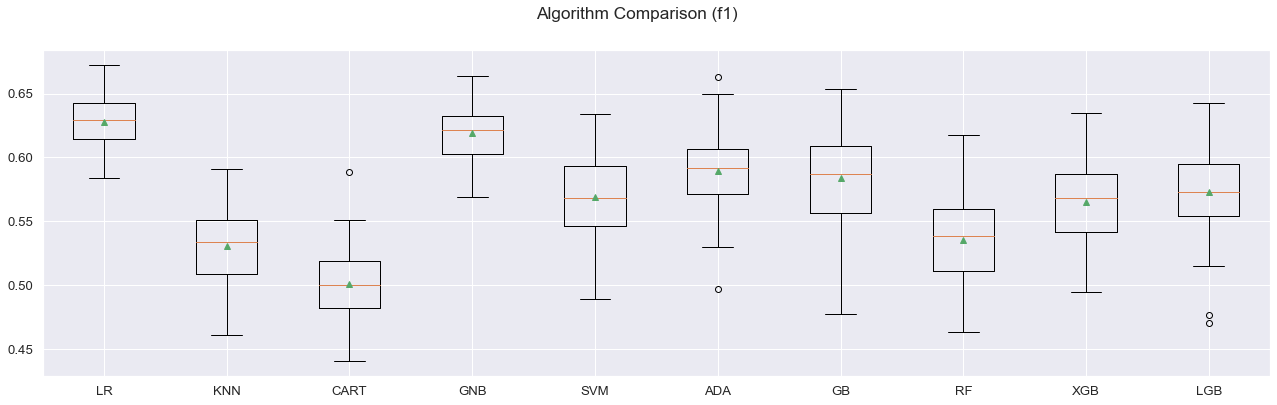

In [ ]:
boxplot('f1', f1_scores)

## F2 Plot

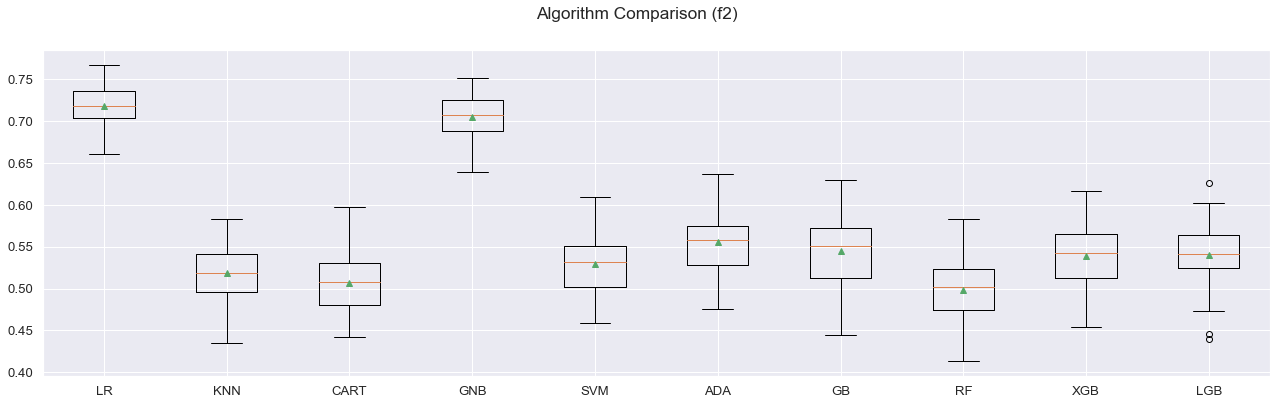

In [ ]:
boxplot('f2', f2_score)

## ROC Plot

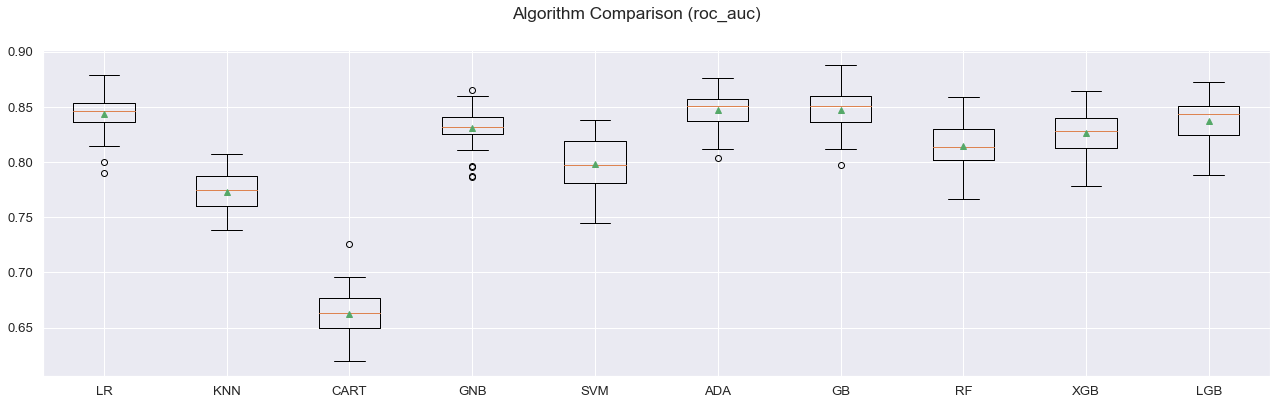

In [ ]:
boxplot('roc_auc', roc_score)

## Balanced accuracy plot

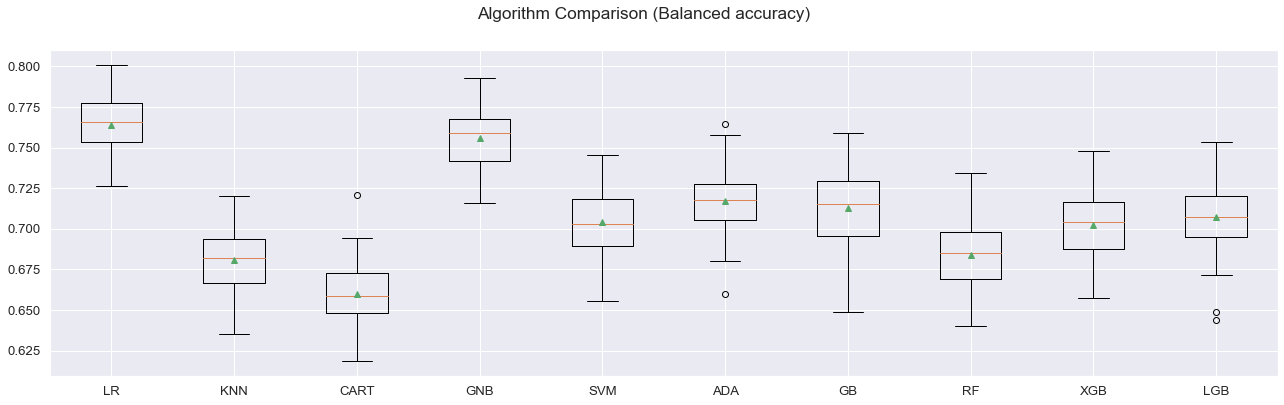

In [ ]:
boxplot('Balanced accuracy', b_acc_score)

### Conclusions from plots:

Since this is an imbalanced dataset, accuracy is of less importance. More emphasis on balanced accuracy, recall, F2 score. Logistic regression is the clear winner here.

### Evaluate each model on testing dataset

In [ ]:
test_scores_df = pd.DataFrame(columns = ['Model', 'Accuracy', 'Balanced accuracy', 'Precision', 'Recall', 'F1', 'F2', 'ROC_AUC'])
train_scores_df = pd.DataFrame(columns = ['Model', 'Accuracy', 'Balanced accuracy', 'Precision', 'Recall', 'F1', 'F2', 'ROC_AUC'])
index = 0

for name, model in models:
    pipe = Pipeline(steps = [
        #('processor', processor),
        #('selector', SelectKBest(mutual_info_classif, k = 15)),
        ('processor', processor),
        # ('selector', SelectKBest(mutual_info_classif, k = 20)),
        (name, model)
    ])

    _ = pipe.fit(X_train, y_train)
    predictions = pipe.predict(X_test)
    predictions_train = pipe.predict(X_train)

    print(name, "trained!")
    f1 = f1_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    accuracy = accuracy_score(y_test, predictions)
    roc = roc_auc_score(y_test, predictions)
    f2 = fbeta_score(y_test, predictions, beta = 2)
    balanced_accuracy = balanced_accuracy_score(y_test, predictions)

    accuracy_train = accuracy_score(y_train, predictions_train)
    balanced_accuracy_train = balanced_accuracy_score(y_train, predictions_train)
    precision_train = precision_score(y_train, predictions_train)
    recall_train = recall_score(y_train, predictions_train)
    f1_train = f1_score(y_train, predictions_train)
    f2_train = fbeta_score(y_train, predictions_train, beta = 2)
    roc_train = roc_auc_score(y_train, predictions_train)

    model_results = pd.DataFrame([[name, accuracy, precision, recall, f1, f2, roc]],
        # columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1', 'ROC_AUC']
    )

    test_scores_df.loc[index] = [name, accuracy, balanced_accuracy, precision, recall, f1, f2, roc]
    train_scores_df.loc[index] = [name, accuracy_train, balanced_accuracy_train, precision_train, recall_train, f1_train, f2_train, roc_train]
    index += 1

    # scores_df.append(model_results, ignore_index = True)
    # scores_df = pd.concat([scores_df, model_results], ignore_index = True)

    # print(classification_report(y_test, predictions))

LR trained!
KNN trained!
CART trained!
GNB trained!
SVM trained!
ADA trained!
GB trained!
RF trained!
XGB trained!
LGB trained!


In [ ]:
test_scores_df

,Model,Accuracy,Balanced accuracy,Precision,Recall,F1,F2,ROC_AUC
0,LR,0.744076,0.760052,0.512017,0.794165,0.622618,0.715328,0.760052
1,KNN,0.694097,0.711023,0.454187,0.747164,0.564951,0.661786,0.711023
2,CART,0.723395,0.658604,0.481259,0.520259,0.500000,0.511962,0.658604
3,GNB,0.722533,0.745898,0.486620,0.795786,0.603936,0.706068,0.745898
4,SVM,0.736321,0.747533,0.502640,0.771475,0.608696,0.696925,0.747533
5,ADA,0.735459,0.763489,0.501481,0.823339,0.623313,0.729675,0.763489
6,GB,0.742783,0.763307,0.510246,0.807131,0.625235,0.722997,0.763307
7,RF,0.760448,0.702966,0.546565,0.580227,0.562893,0.573167,0.702966
8,XGB,0.763033,0.731607,0.544489,0.664506,0.598540,0.636448,0.731607
9,LGB,0.760017,0.750231,0.535714,0.729335,0.617708,0.680169,0.750231


In [ ]:
train_scores_df

,Model,Accuracy,Balanced accuracy,Precision,Recall,F1,F2,ROC_AUC
0,LR,0.766897,0.766912,0.750528,0.799229,0.774113,0.788990,0.766912
1,KNN,0.838979,0.839022,0.786997,0.929329,0.852261,0.896887,0.839022
2,CART,0.997592,0.997593,0.995839,0.999358,0.997595,0.998652,0.997593
3,GNB,0.762723,0.762749,0.737163,0.816254,0.774695,0.799107,0.762749
4,SVM,0.804302,0.804324,0.778857,0.849663,0.812721,0.834490,0.804324
5,ADA,0.773961,0.773980,0.753494,0.814006,0.782582,0.801138,0.773980
6,GB,0.801894,0.801918,0.775271,0.849984,0.810910,0.833911,0.801918
7,RF,0.997592,0.997593,0.995521,0.999679,0.997596,0.998845,0.997593
8,XGB,0.947022,0.947039,0.917241,0.982653,0.948821,0.968835,0.947039
9,LGB,0.896292,0.896313,0.863757,0.940893,0.900677,0.924383,0.896313


RF, XGB and CART models seem to suffer from overfitting.

In [ ]:
results = test_scores_df.sort_values(["F1", "Recall", "Precision"], ascending = False)
# results = scores_df.sort_values(['F2', 'Precision', 'Recall'], ascending = False)
results

,Model,Accuracy,Balanced accuracy,Precision,Recall,F1,F2,ROC_AUC
6,GB,0.742783,0.763307,0.510246,0.807131,0.625235,0.722997,0.763307
5,ADA,0.735459,0.763489,0.501481,0.823339,0.623313,0.729675,0.763489
0,LR,0.744076,0.760052,0.512017,0.794165,0.622618,0.715328,0.760052
9,LGB,0.760017,0.750231,0.535714,0.729335,0.617708,0.680169,0.750231
4,SVM,0.736321,0.747533,0.502640,0.771475,0.608696,0.696925,0.747533
3,GNB,0.722533,0.745898,0.486620,0.795786,0.603936,0.706068,0.745898
8,XGB,0.763033,0.731607,0.544489,0.664506,0.598540,0.636448,0.731607
1,KNN,0.694097,0.711023,0.454187,0.747164,0.564951,0.661786,0.711023
7,RF,0.760448,0.702966,0.546565,0.580227,0.562893,0.573167,0.702966
2,CART,0.723395,0.658604,0.481259,0.520259,0.500000,0.511962,0.658604


### Re-examining KNN (likely needs to be redone)

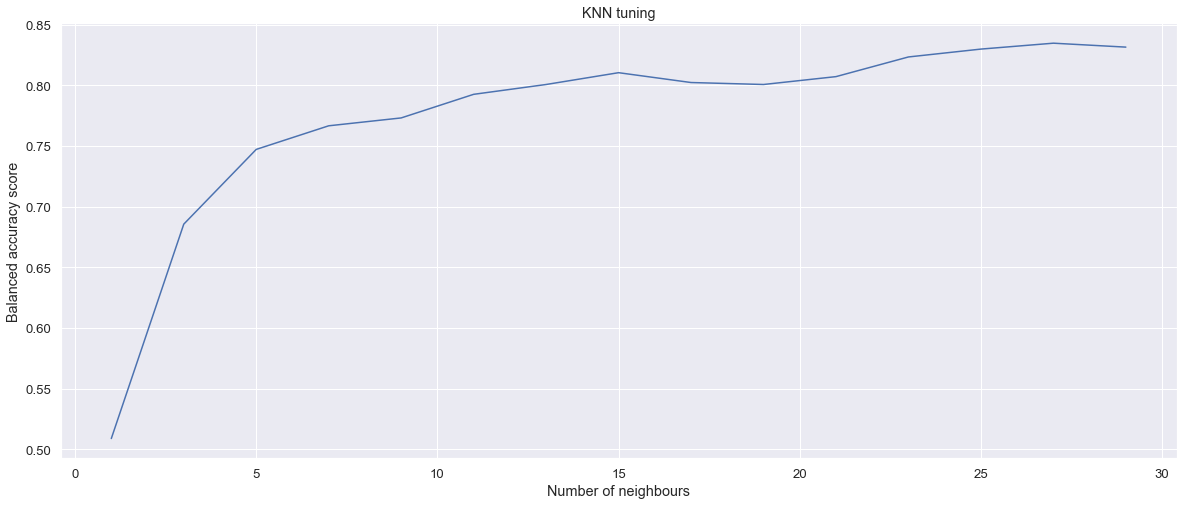

In [ ]:
KNN_results = list()

for n in range(1, 31, 2):
    pipe = Pipeline(steps = [
            ('processor', processor),
            ('KNN', KNeighborsClassifier(n_neighbors = n))
    ])
    _ = pipe.fit(X_train, y_train)
    predictions = pipe.predict(X_test)
    accuracy = recall_score(y_test, predictions)
    KNN_results.append(accuracy)
    #KNN_results.append(pipe.score(X_test, y_test))

fig = plt.figure(figsize = (20, 8))
plt.title('KNN tuning')
plt.xlabel('Number of neighbours')
plt.ylabel('Balanced accuracy score')
plt.plot(range(1, 31, 2), KNN_results)
plt.show()

In [ ]:
max_value = max(KNN_results)
max_index = KNN_results.index(max_value)
n_list = list(range(1, 31, 2))
best_n = n_list[max_index]
best_n

27

### KNN re-examination using CV

In [ ]:
KNN_b_acc, KNN_recall, KNN_f1 = list(), list(), list()

for n in range(1, 31, 2):
    pipe = Pipeline(steps = [
            ('processor', processor),
            ('KNN', KNeighborsClassifier(n_neighbors = n))
    ])
    kfold = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 1234)
    score = cross_validate(pipe, X, y, scoring = ['balanced_accuracy', 'recall', 'f1'], cv = kfold)
    KNN_b_acc.append(score['test_balanced_accuracy'].mean())
    KNN_recall.append(score['test_recall'].mean())
    KNN_f1.append(score['test_f1'].mean())
    #KNN_results.append(pipe.score(X_test, y_test))

In [ ]:
def KNN_plot(metric, scores):
    fig = plt.figure(figsize = (20, 8))
    plt.title(f'KNN tuning ({metric})')
    plt.xlabel('Number of neighbours')
    plt.ylabel(f'{metric} score')
    plt.plot(range(1, 31, 2), scores)
    plt.show()

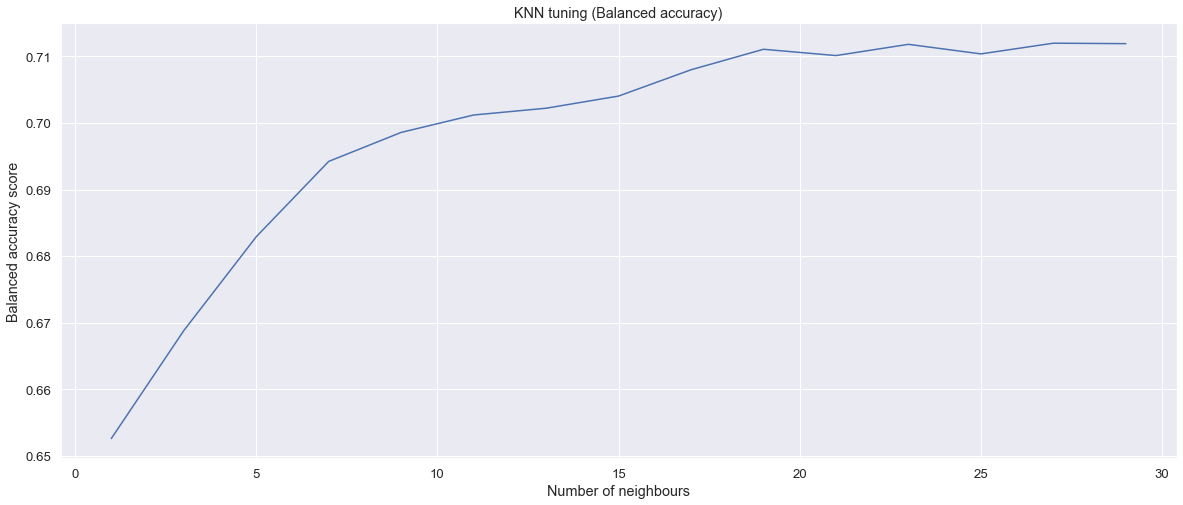

In [ ]:
KNN_plot('Balanced accuracy', KNN_b_acc)

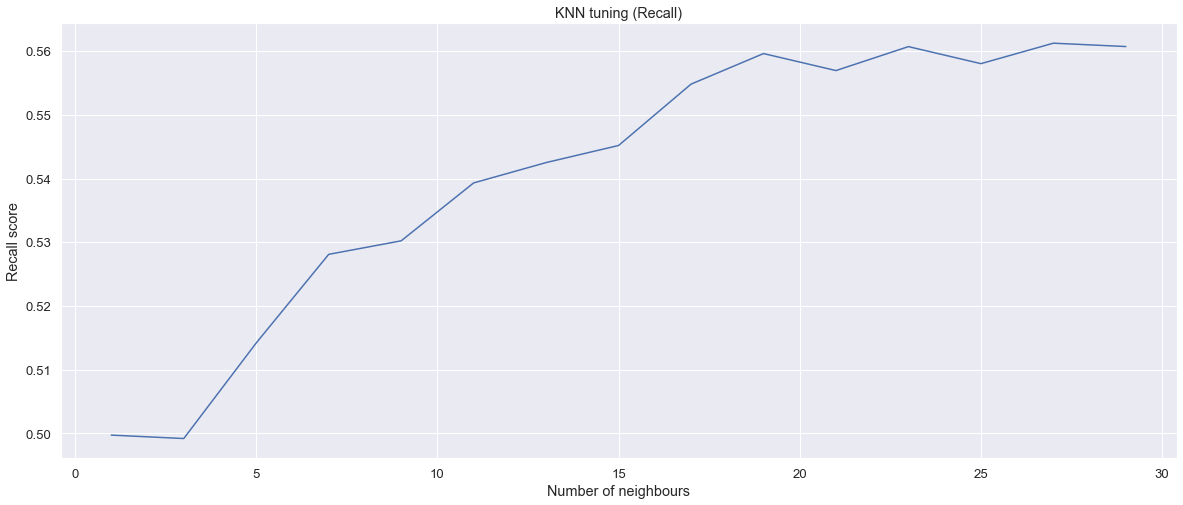

In [ ]:
KNN_plot('Recall', KNN_recall)

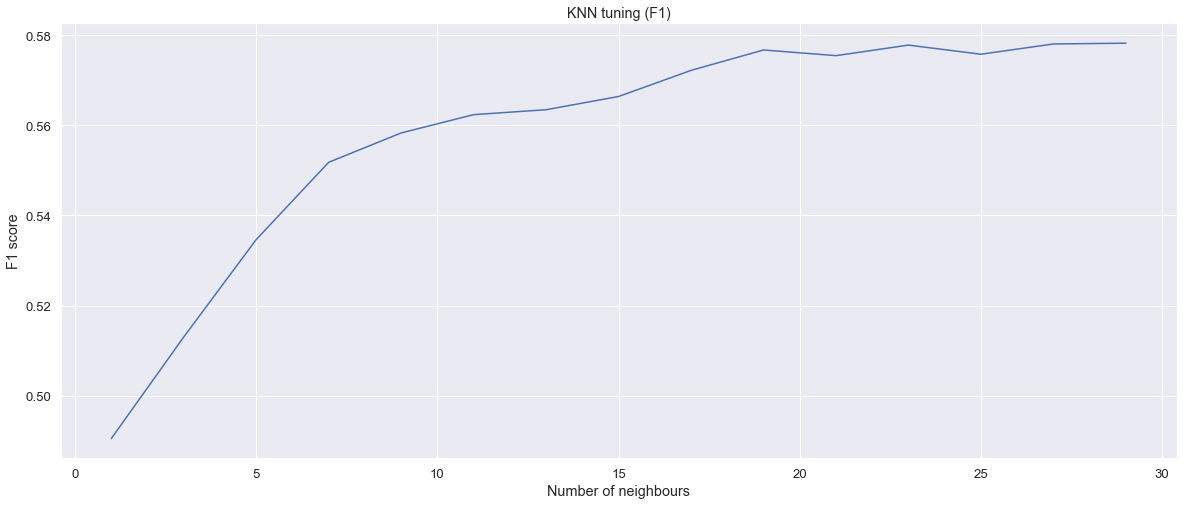

In [ ]:
KNN_plot('F1', KNN_f1)

22 seems to be the best value.

So, the optimal number of neighbours is (x). (value changes due to randomness of train_test_split)

### Re-examining RF (likely needs to be redone as well)

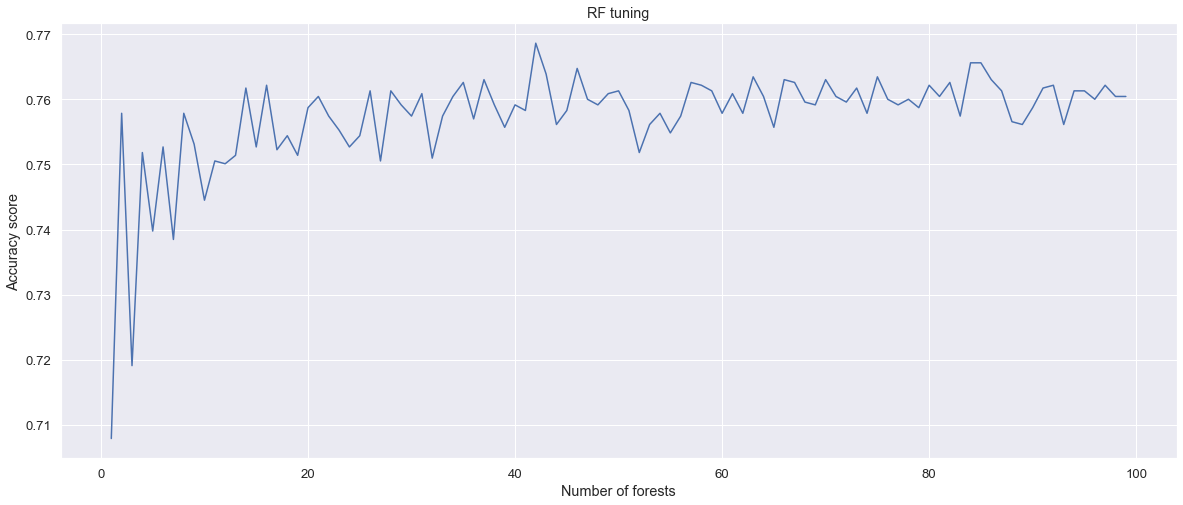

In [ ]:
RF_results = list()

for n in range(1, 100, 1):
    pipe = Pipeline(steps = [
            ('processor', processor),
            ('RF', RandomForestClassifier(n_estimators = n))
    ])
    _ = pipe.fit(X_train, y_train)
    predictions = pipe.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    # KNN_results.append(accuracy)
    RF_results.append(pipe.score(X_test, y_test))

fig = plt.figure(figsize = (20, 8))
plt.title('RF tuning')
plt.xlabel('Number of forests')
plt.ylabel('Accuracy score')
plt.plot(range(1, 100, 1), RF_results)
plt.show()

In [ ]:
max_value = max(RF_results)
max_index = RF_results.index(max_value)
n_list = list(range(1, 100))
RF_best_n = n_list[max_index]
RF_best_n

42

So, best value of n_estimators is (x).

### Re-fitting KNN and RF

In [ ]:
KNN_pipe = Pipeline(steps = [
    ('processor', processor),
    ('KNN', KNeighborsClassifier(n_neighbors = 21))
])
_ = KNN_pipe.fit(X_train, y_train)
predictions = KNN_pipe.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
F1 = f1_score(y_test, predictions)
roc = roc_auc_score(y_test, predictions)

print("FOR KNN")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1:", F1)
print("ROC_AUC:", roc)

RF_pipe = Pipeline(steps = [
    ('processor', processor),
    ('RF', RandomForestClassifier(n_estimators = RF_best_n))
])
_ = RF_pipe.fit(X_train, y_train)
predictions = RF_pipe.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
F1 = f1_score(y_test, predictions)
roc = roc_auc_score(y_test, predictions)

print("\nFOR RF")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1:", F1)
print("ROC_AUC:", roc)

FOR KNN
Accuracy: 0.7018526497199483
Precision: 0.4649859943977591
Recall: 0.807131280388979
F1: 0.590047393364929
ROC_AUC: 0.7354318373775881

FOR RF
Accuracy: 0.7600172339508833
Precision: 0.5464396284829721
Recall: 0.5721231766612642
F1: 0.5589865399841646
ROC_AUC: 0.7000874099268762


# Taking a closer look at some of the models

## 1. Logistic Regression

0.7440758293838863


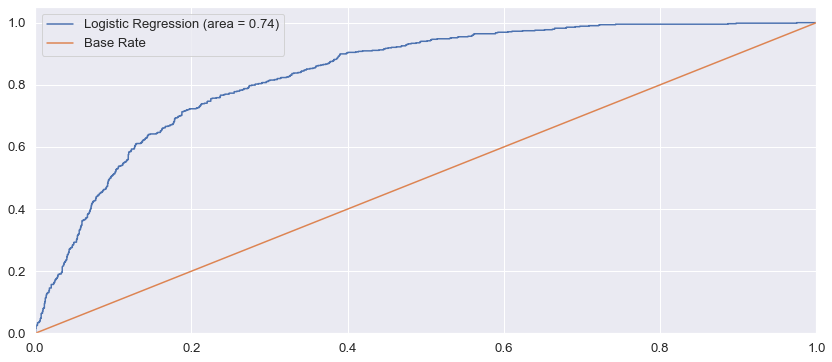

In [ ]:
LR_clf = Pipeline(steps = [
    ('processor', processor),
    ('LR', LogisticRegression(class_weight = 'balanced'))
])
LR_clf.fit(X_train, y_train)
y_pred = LR_clf.predict(X_test)
probs = LR_clf.predict_proba(X_test)
probs = probs[:, 1]
clf_roc_auc = accuracy_score(y_test, y_pred)

rf_fpr, rf_tpr, _ = roc_curve(y_test, probs)

plt.figure(figsize = (14, 6))

plt.plot(rf_fpr, rf_tpr, label='Logistic Regression (area = %0.2f)' % clf_roc_auc)
plt.plot([0,1], [0,1],label='Base Rate')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.legend()

print(clf_roc_auc)
plt.show()


### Tuning Hyperparameters of Logisitc Regression

In [ ]:
tuned_clf_df = pd.DataFrame(columns = ['Model', 'Parameters', 'Accuracy', 'Precision', 'Recall', 'F1', 'F2', 'ROC'])

In [ ]:
solvers = ['liblinear', 'newton-cg', 'lbfgs']
c_values = list(np.arange(0, 2, 0.2))
penalty = ['l1', 'l2', 'none']

parameters = dict(LR__C = c_values, LR__solver = solvers, LR__penalty = penalty)

kfold = StratifiedKFold(n_splits = 10)
grid_search = GridSearchCV(
    estimator = LR_clf, param_grid = parameters, cv = kfold, #scoring = make_scorer(fbeta_score, beta = 2)
    scoring = 'recall'
)
grid_result = grid_search.fit(X, y)

# best result
LR_best_score = grid_result.best_score_
LR_best_parameters = grid_result.best_params_
print(f'Best score was {LR_best_score} with {LR_best_parameters}\n')

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f'{mean:.6f} ({stdev:.6f}) with {param}')

Best score was 0.7956212983727216 with {'LR__C': 0.2, 'LR__penalty': 'l1', 'LR__solver': 'liblinear'}

nan (nan) with {'LR__C': 0.0, 'LR__penalty': 'l1', 'LR__solver': 'liblinear'}
nan (nan) with {'LR__C': 0.0, 'LR__penalty': 'l1', 'LR__solver': 'newton-cg'}
nan (nan) with {'LR__C': 0.0, 'LR__penalty': 'l1', 'LR__solver': 'lbfgs'}
nan (nan) with {'LR__C': 0.0, 'LR__penalty': 'l2', 'LR__solver': 'liblinear'}
nan (nan) with {'LR__C': 0.0, 'LR__penalty': 'l2', 'LR__solver': 'newton-cg'}
nan (nan) with {'LR__C': 0.0, 'LR__penalty': 'l2', 'LR__solver': 'lbfgs'}
nan (nan) with {'LR__C': 0.0, 'LR__penalty': 'none', 'LR__solver': 'liblinear'}
0.791875 (0.029957) with {'LR__C': 0.0, 'LR__penalty': 'none', 'LR__solver': 'newton-cg'}
0.791875 (0.029957) with {'LR__C': 0.0, 'LR__penalty': 'none', 'LR__solver': 'lbfgs'}
0.795621 (0.027602) with {'LR__C': 0.2, 'LR__penalty': 'l1', 'LR__solver': 'liblinear'}
nan (nan) with {'LR__C': 0.2, 'LR__penalty': 'l1', 'LR__solver': 'newton-cg'}
nan (nan) with 

#### Check accuracy with updated parameters.

In [ ]:
LR_clf = Pipeline(steps = [
    ('processor', processor),
    ('LR', LogisticRegression(C = 0.2, solver = 'liblinear', penalty = 'l1', class_weight = 'balanced'))
])
LR_clf.fit(X_train, y_train)
y_pred = LR_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
parameters = "C = 1, solver = liblinear"
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
F1 = f1_score(y_test, y_pred)
F2 = fbeta_score(y_test, y_pred, beta = 2)
roc = roc_auc_score(y_test, y_pred)

tuned_clf_df.loc[0] = ['LR', parameters, accuracy, precision, recall, F1, F2, roc]

tuned_clf_df

,Model,Parameters,Accuracy,Precision,Recall,F1,F2,ROC
0,LR,"C = 1, solver = liblinear",0.741922,0.509317,0.797407,0.621605,0.716366,0.759619


#### To be done: tune hyperparameters of some other models

### 'Finalise' the model (preliminary)

In [ ]:
final_model = Pipeline(steps = [
        ('processor', processor),
        # ('selector', SelectKBest(mutual_info_classif, k = 30)),
        # ('LR', LogisticRegression(C = 1.6681005372000592, solver = 'liblinear', penalty = 'l1', class_weight = 'balanced', max_iter=1000))
        ('LR', LogisticRegression(C = 0.2, solver = 'liblinear', penalty = 'l1', class_weight = 'balanced'))
        # ('RF', RandomForestClassifier(n_estimators = 72))
])
_ = final_model.fit(X_train, y_train)
predictions = final_model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
recall = recall_score(y_test, predictions)

print(accuracy)
print(balanced_accuracy_score(y_test, predictions))
print(recall)

0.7419215855234813
0.7596188965233868
0.7974068071312804


In [ ]:
dummy_pred = [0 for _ in range(2321)]
dum_bal_acc = balanced_accuracy_score(y_test, dummy_pred)
print(dum_bal_acc)

0.5


In [ ]:
len(predictions)

2321

### Making a random prediction

In [ ]:
df.head(5)

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,No,Yes,No,1.0,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,0
1,No,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,0
2,No,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,1
3,No,No,No,45.0,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,0
4,No,No,No,2.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,1


In [ ]:
tenure = 1
month_charge = 40
test = ['Yes', 'Yes', 'Yes', tenure, 'Yes', 'Yes', 'Fiber optic', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Month-to-month', 'Yes', 'Electronic check', month_charge]
dummy = pd.DataFrame([test], columns = df.drop('Churn', axis = 1).columns)

predicted_class = final_model.predict(dummy)[0]             # The actual predicted class
print(predicted_class)
probabilties = final_model.predict_proba(dummy)             # The probabilities
probabilties

1


array([[0.18873063, 0.81126937]])

In [ ]:
predicted = final_model.predict_proba(dummy)
predicted

array([[0.18873063, 0.81126937]])

### Feature importances (to be done later)

In [ ]:
onehot_columns = list(final_model.named_steps['processor'].named_transformers_['onehot'].named_steps['encoder'].get_feature_names(input_features=onehot_columns))
numeric_features_list = list(num_features)
numeric_features_list.extend(onehot_columns)
numeric_features_list.extend(ordinal_columns)

In [ ]:
len(numeric_features_list)

24

In [ ]:
eli5.explain_weights(final_model.named_steps['LR'], top=40, feature_names=numeric_features_list, feature_filter=lambda x: x != '<BIAS>')

Weight?,Feature
+0.919,InternetService_Fiber optic
+0.722,Contract_Month-to-month
+0.287,PaymentMethod_Electronic check
+0.282,MultipleLines
+0.261,StreamingMovies
+0.230,PaperlessBilling
+0.226,StreamingTV
+0.180,SeniorCitizen
+0.095,DeviceProtection
-0.006,PaymentMethod_Credit card (automatic)


In [ ]:
eli5.show_weights(final_model.named_steps['LR'], top=40, feature_names=numeric_features_list) #feature_filter=lambda x: x != '<BIAS>')

Weight?,Feature
+0.866,InternetService_Fiber optic
+0.774,Contract_Month-to-month
+0.287,PaymentMethod_Electronic check
+0.282,MultipleLines
+0.261,StreamingMovies
+0.230,PaperlessBilling
+0.226,StreamingTV
+0.180,SeniorCitizen
+0.095,DeviceProtection
-0.006,PaymentMethod_Credit card (automatic)


In [ ]:
importance = final_model.named_steps['LR'].coef_

In [ ]:
importance

array([[-2.12760491,  0.        , -0.05273927,  0.86601908, -0.85342744,
         0.77423509,  0.        , -0.60278099, -0.07943514, -0.00564128,
         0.2872553 ,  0.        ,  0.17979655,  0.        , -0.28754953,
        -0.39670527,  0.28153014, -0.32572956, -0.13931113,  0.0954955 ,
        -0.33252781,  0.22606362,  0.26124283,  0.22970738]])

In [ ]:
len(importance[0])

24

In [ ]:
print("Features without importance:")
for i, (num1, num2) in enumerate(zip(numeric_features_list, importance[0])):
    if num2 == 0.0:
        message = f'Feature {i + 1}: {num1}'
        print(message)

Features without importance:
Feature 2: MonthlyCharges
Feature 3: InternetService_DSL
Feature 12: PaymentMethod_Mailed check
Feature 14: Partner


In [ ]:
# onehot_columns = list(final_model.named_steps['processor'].named_transformers_['categorical'].named_steps['encoder'].get_feature_names(input_features=cat_features))

In [ ]:
# numeric_features_list = list(num_features)
# numeric_features_list.extend(onehot_columns)

In [ ]:
# fig, ax = plt.subplots(1, 1, figsize = (20, 20))
# final_model.named_steps['XGB'].get_booster().feature_names = numeric_features_list
# plot_importance(final_model.named_steps['XGB'].get_booster(), ax = ax)
# plt.show()

In [ ]:
# model = final_model.named_steps['XGB']
# for col, score in zip(numeric_features_list, model.feature_importances_):
#     print(col, score * 100)
from tensorflow.keras.datasets import mnist